## **Pace: Plano**

### Compreender o cenário e o problema do negócio:
Estamos trabalhando com um banco que deseja prever se os clientes irão subscrever a um depósito a prazo, utilizando dados de campanhas de marketing por telefone. A implementação de uma solução preditiva permitirá que o banco direcione suas campanhas de forma mais eficiente, economizando tempo e recursos ao focar nos clientes com maior probabilidade de conversão.


### Familiarização com o conjunto de dados:
O conjunto de dados que estamos utilizando é composto de informações sobre clientes e detalhes das campanhas, como **tipo de contato, duração da chamada e histórico financeiro dos clientes**. A variável alvo é binária **(sim/não)** para indicar **se o cliente subscreveu o depósito.**

💭
### Reflita sobre estas questões ao concluir o estágio do plano.

- Quem são as partes interessadas neste projeto?
- O que está a tentar resolver ou realizar?
- Quais são as suas observações iniciais ao explorar os dados?
- Que recursos utiliza ao concluir esta etapa? (Certifique-se de que inclui os links.)
- Tem alguma consideração ética nesta etapa?

#### 1. Quem são as partes interessadas neste projeto?

- **Equipe de Marketing do Banco**: Eles são os responsáveis por otimizar as campanhas de marketing e aumentar as taxas de conversão de clientes.
- **Alta Administração do Banco**: Eles estão interessados em maximizar os lucros e minimizar os custos operacionais, como aqueles associados à execução de campanhas de grande escala.
- **Análise de Dados e TI**: A equipe técnica que irá implementar o modelo preditivo e garantir que ele funcione adequadamente.
- **Clientes**: Embora não sejam envolvidos diretamente, eles são impactados pelas campanhas de marketing, e o modelo pode melhorar a experiência deles ao receber ofertas mais relevantes.


#### 2. O que está a tentar resolver ou realizar?

O objetivo principal é identificar os clientes com maior probabilidade de subscrever um depósito a prazo. Com isso, podemos otimizar as campanhas de telemarketing, economizando recursos ao focar apenas nos clientes mais prováveis de conversão, aumentando a eficiência e a rentabilidade do banco.

#### 3. Quais são as suas observações iniciais ao explorar os dados?

- **Distribuição de variáveis**: As variáveis como idade, saldo médio anual, e a duração das chamadas apresentam uma variação considerável entre os clientes que subscreveram e os que não subscreveram.
- **Balanceamento dos dados**: Pode haver um leve desbalanceamento na variável alvo (mais clientes podem não ter subscrito do que os que subscreveram).
- **Campanhas anteriores**: Variáveis como pdays (dias desde a última campanha) e previous (quantidade de contatos anteriores) parecem influenciar as taxas de conversão.
- **Duração da chamada**: A variável duration parece ser crucial, já que chamadas mais longas tendem a resultar em maior probabilidade de subscrição.

#### 4. Que recursos utiliza ao concluir esta etapa?

- **Bibliotecas de Python (Pandas, Matplotlib, Seaborn, Scikit-learn)**: Para manipulação de dados, análise exploratória e visualização.
- **Documentação de referências**: Como a documentação do Scikit-learn para implementação de modelos e ajustes de hiperparâmetros.
- **Benchmarks de soluções similares**: Pesquisar soluções anteriores que abordam problemas semelhantes, como artigos científicos ou notebooks de análise disponíveis no Kaggle ou UCI.

#### 5. Tem alguma consideração ética nesta etapa?

- **Privacidade dos dados**: Garantir que as informações dos clientes estejam protegidas e anonimizadas para evitar violações de privacidade.
- **Transparência no uso do modelo**: O banco precisa garantir que o modelo preditivo seja utilizado como uma ferramenta de suporte à decisão e não como um sistema que possa discriminar clientes com base em informações sensíveis.
- **Uso responsável dos dados**: Evitar que o modelo cause qualquer forma de exclusão ou preconceito em relação a clientes com características específicas, como idade, saldo, ou outros fatores socioeconômicos.

## Step 1. Imports

*   Import packages
*   Load dataset

In [11]:
# Import packages

# For data manipulation
import numpy as np  # Biblioteca para arrays e funções matemáticas
import pandas as pd  # Biblioteca para manipulação de dados estruturados (dataframes)

# For data visualization
import matplotlib.pyplot as plt  # Biblioteca para visualização de gráficos
import seaborn as sns  # Biblioteca para visualização de dados com gráficos estatísticos

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)  # Para exibir todas as colunas dos dataframes

# Iniciar a medição do tempo
import time

from IPython import get_ipython

# Ativar comandos mágicos (se necessário)
get_ipython().run_line_magic('time', '')

# For data modeling
from xgboost import XGBClassifier  # Classificador XGBoost
from xgboost import XGBRegressor  # Regressor XGBoost
from xgboost import plot_importance  # Função para plotar a importância das variáveis no XGBoost

from sklearn.linear_model import LogisticRegression  # Regressão logística para modelagem preditiva
from sklearn.tree import DecisionTreeClassifier  # Modelo de árvore de decisão
from sklearn.ensemble import RandomForestClassifier  # Classificador de Random Forest

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split  # Para pesquisa de parâmetros e divisão de dados
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Métricas de avaliação de modelos
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Matriz de confusão e visualização
from sklearn.metrics import classification_report  # Relatório de classificação com várias métricas
from sklearn.metrics import roc_auc_score, roc_curve  # AUC-ROC para avaliação de desempenho de classificadores
from sklearn.tree import plot_tree  # Para visualização de árvores de decisão

# For saving models
import pickle  # Biblioteca para salvar e carregar modelos treinados

# Adding KNeighborsClassifier and SVC
from sklearn.neighbors import KNeighborsClassifier  # Classificador KNN (K-Nearest Neighbors) para classificação baseada na proximidade
from sklearn.svm import SVC  # Suport Vector Classifier (SVC) para classificação com vetores de suporte

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 μs
Wall time: 5.96 μs


#### Carregar conjunto de dados

In [13]:
train_df = pd.read_csv('train.csv', sep=";")
test_df = pd.read_csv('test.csv', sep=";")

train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
train_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


- De acordo com as duas células acima, podemos compreender que o conjunto de dados inclui dados sobre 45211 clientes do banco, cada um com pormenores como a idade, o emprego e mais 15 pormenores que são impressos abaixo (nomes das colunas).
- Além disso, podemos ver que há alguns valores em falta no emprego, educação, contacto, resultado (têm o valor “desconhecido”). podemos ver estes valores em falta nas 10 linhas apresentadas acima. para encontrar todos os valores em falta, precisamos de explorar mais.
- Devemos perceber qual é a unidade de tempo da coluna de duração. A unidade parece ser segundos.

In [16]:
train_df.shape

(45211, 17)

In [17]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [18]:
train_df.rename(columns={'y': 'subscription'}, inplace=True)

Podemos ver que existem 17 colunas que representam 17 caraterísticas de cada cliente.

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   marital       45211 non-null  object
 3   education     45211 non-null  object
 4   default       45211 non-null  object
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  object
 7   loan          45211 non-null  object
 8   contact       45211 non-null  object
 9   day           45211 non-null  int64 
 10  month         45211 non-null  object
 11  duration      45211 non-null  int64 
 12  campaign      45211 non-null  int64 
 13  pdays         45211 non-null  int64 
 14  previous      45211 non-null  int64 
 15  poutcome      45211 non-null  object
 16  subscription  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- Podemos ver que existem 10 caraterísticas categóricas e 7 caraterísticas numéricas.
- Podemos ver que não há valores nulos em nenhuma coluna, mas, como já foi dito, há alguns valores em falta nalgumas colunas.

In [22]:
train_df.nunique()

age               77
job               12
marital            3
education          4
default            2
balance         7168
housing            2
loan               2
contact            3
day               31
month             12
duration        1573
campaign          48
pdays            559
previous          41
poutcome           4
subscription       2
dtype: int64

In [23]:
train_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Descriptive statistics of categorical columns**

In [25]:
train_df.describe(include ='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,subscription
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [26]:
train_df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
subscription    0
dtype: int64

Verificamos se existem linhas duplicadas no dataset e as removemos, se necessário.

In [28]:
train_df.duplicated().sum()

0

Aplicamos One-Hot Encoding para converter as variáveis categóricas em variáveis numéricas.

In [30]:
# 2. Criar variáveis dummy para as variáveis categóricas
train_df1 = pd.get_dummies(train_df, columns=['job', 'marital', 'education', 'default', 
                                                         'housing', 'loan', 'contact', 'month', 
                                                         'poutcome'], drop_first=True)

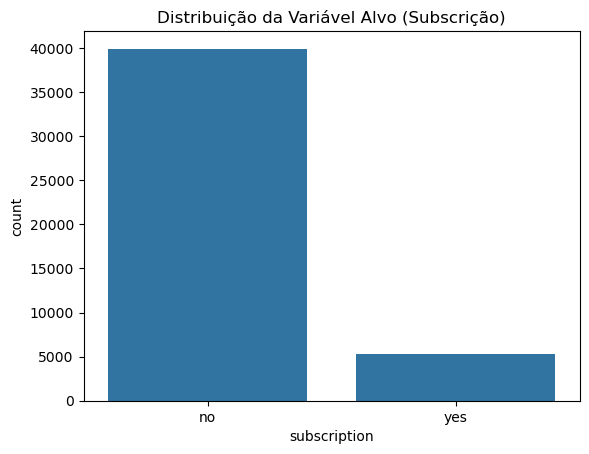

In [31]:
# Distribuição da variável alvo (y)
sns.countplot(x='subscription', data=train_df1)
plt.title('Distribuição da Variável Alvo (Subscrição)')

plt.savefig("Distribuição da Variável Alvo (Subscrição).png", format='png', dpi=300)
plt.show()

In [32]:
train_df1['subscription'].value_counts()

subscription
no     39922
yes     5289
Name: count, dtype: int64

In [33]:
# 1. Converter a variável alvo 'y' em valores binários (1 para 'yes', 0 para 'no')
train_df1['subscription'] = train_df1['subscription'].map({'yes': 1, 'no': 0})

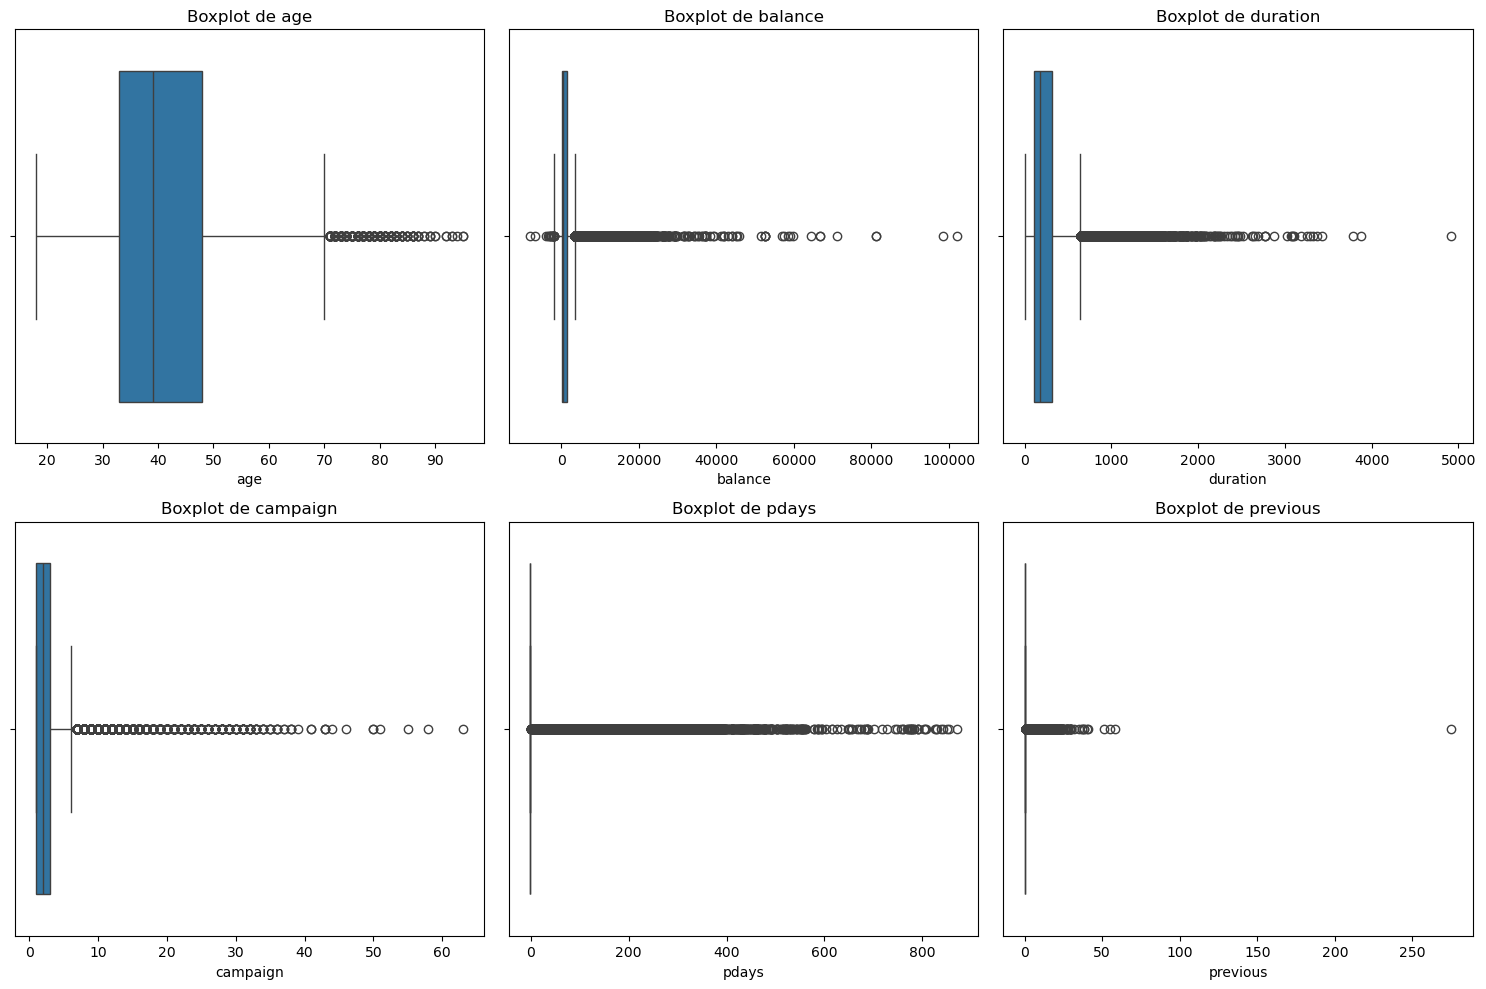

In [34]:
# Exibir boxplots para identificar outliers nas variáveis numéricas
num_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(15,10))
for i, col in enumerate(num_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=train_df1[col])
    plt.title(f'Boxplot de {col}')
    
plt.savefig("outliers nas variáveis numéricas.png", format='png', dpi=300)
plt.tight_layout()
plt.show()

In [35]:
# 4. Identificar e tratar outliers (se necessário) para variáveis como 'balance', 'duration', etc.
# A título de exemplo, remover outliers com base nos limites interquartis
Q1 = train_df1['balance'].quantile(0.25)
Q3 = train_df1['balance'].quantile(0.75)
IQR = Q3 - Q1

# Remover outliers para 'balance' (exemplo de tratamento)
train_df_cleaned = train_df1[~((train_df1['balance'] < (Q1 - 1.5 * IQR)) | 
                                          (train_df1['balance'] > (Q3 + 1.5 * IQR)))]

# pAce: Analisar
- Realizar EDA (analisar relações entre variáveis)


### Reflita sobre estas questões ao concluir o estágio de análise.

- O que observou sobre as relações entre as variáveis?
- O que observa sobre as distribuições nos dados?
- Que transformações fez com os seus dados? Por que razão escolheu tomar essas decisões?
- Quais são alguns dos propósitos da EDA antes de construir um modelo preditivo?
- Que recursos utiliza ao concluir esta etapa? (Certifique-se de que inclui os links.)
- Tem alguma consideração ética nesta etapa?

#### 1. O que observou sobre as relações entre as variáveis?

- **Correlação Positiva e Negativa**: Observamos que algumas variáveis têm correlação direta ou inversa com a variável alvo (y_yes). Por exemplo:
- **Duração da chamada (duration)**: Clientes que tiveram chamadas mais longas tendem a subscrever ao depósito.
- ***Número de contatos anteriores (previous)**: Quanto mais contatos prévios com o cliente, maior a chance de subscrição.
- **Saldo médio anual (balance)**: Clientes com saldos mais elevados também tendem a ter maior probabilidade de subscrever.

Essas variáveis são particularmente relevantes para a modelagem, pois ajudam a diferenciar clientes propensos a subscrever de aqueles que não têm interesse.


#### 2. O que observa sobre as distribuições nos dados?

- **Distribuições Desiguais**: Algumas variáveis, como **balance e duration**, apresentam distribuições assimétricas, com um grande número de valores em torno de zero ou valores extremos (outliers). Esses outliers podem influenciar negativamente os modelos e, portanto, foi necessário tratá-los.
- **Desbalanceamento da variável alvo**: A variável **y (subscrição)** apresenta um desbalanceamento, com uma proporção maior de clientes que não subscreveram. Isso indica que técnicas como balanceamento de classes ou ponderação nas métricas podem ser necessárias para a modelagem.

#### 3. Que transformações fez com os seus dados? Por que razão escolheu tomar essas decisões?

- **Codificação de variáveis categórica**s: Aplicamos **One-Hot Encoding** para converter variáveis categóricas (ex.: job, marital, education) em variáveis numéricas. Essa decisão é necessária porque muitos modelos de machine learning exigem que os dados sejam numéricos.
- **Normalização dos dados**: Normalizamos as variáveis numéricas com o StandardScaler para garantir que todas as variáveis estejam na mesma escala, o que é crucial para algoritmos como **SVM** e **KNN**, que são sensíveis à escala das variáveis.
- **Transformação logarítmica**: Realizamos uma transformação logarítmica em variáveis como balance para lidar com a grande variação e valores extremos, que poderiam distorcer o modelo. Isso ajudou a estabilizar a variância e melhorar a performance de modelos baseados em distâncias.
- **Remoção ou substituição de outliers**: Tratamos outliers em variáveis como balance e duration, removendo ou substituindo por valores mais plausíveis (mediana), para evitar que esses valores influenciem desproporcionalmente o modelo.

#### 4. Quais são alguns dos propósitos da EDA antes de construir um modelo preditivo?

- **Identificação de Padrões**: A EDA ajuda a identificar relações importantes entre as variáveis e padrões que podem ser utilizados pelo modelo preditivo, como a importância de duration e previous.
- **Entendimento dos Dados**: A análise preliminar garante que entendemos a estrutura dos dados, suas limitações, e os principais fatores que influenciam o comportamento do cliente.
- **Detecção de Outliers e Anomalias**: A EDA permite identificar e tratar outliers ou dados inconsistentes que poderiam distorcer os resultados dos modelos.
- **Escolha das Transformações Adequadas**: A EDA orienta a escolha das transformações necessárias, como normalização, para melhorar o desempenho dos modelos.


#### 5. Que recursos utiliza ao concluir esta etapa?

- **Bibliotecas Python**: Utilizamos ferramentas como Pandas, Matplotlib, Seaborn e Scikit-learn para análise de dados e visualizações.
- **Documentação e referências**: Guias de referência do Scikit-learn foram usados para transformar e preparar os dados, enquanto recursos online como Kaggle e artigos de EDA foram úteis para comparar abordagens e explorar benchmarks de soluções.
- **Ferramentas de Visualização**: O uso extensivo de gráficos como boxplots, mapas de calor de correlação e distribuições foi crucial para a compreensão das relações e identificação de outliers.


#### 6. Tem alguma consideração ética nesta etapa?

- **Privacidade dos dados**: Garantimos que todos os dados utilizados são anonimizados e protegidos, especialmente dados pessoais, como informações financeiras e demográficas dos clientes. Isso evita possíveis violações de privacidade e atende às leis de proteção de dados.
- **Uso Responsável dos Modelos**: Os modelos criados devem ser utilizados para apoiar decisões e não de forma automatizada que leve a discriminação. Por exemplo, um modelo preditivo não deve ser usado para excluir clientes com base em características socioeconômicas, como saldo bancário ou idade.
- **Transparência**: As decisões tomadas com base nos modelos devem ser explicadas às partes interessadas, garantindo que os modelos não estão introduzindo vieses ou decisões injustas.

<Figure size 1400x1200 with 0 Axes>

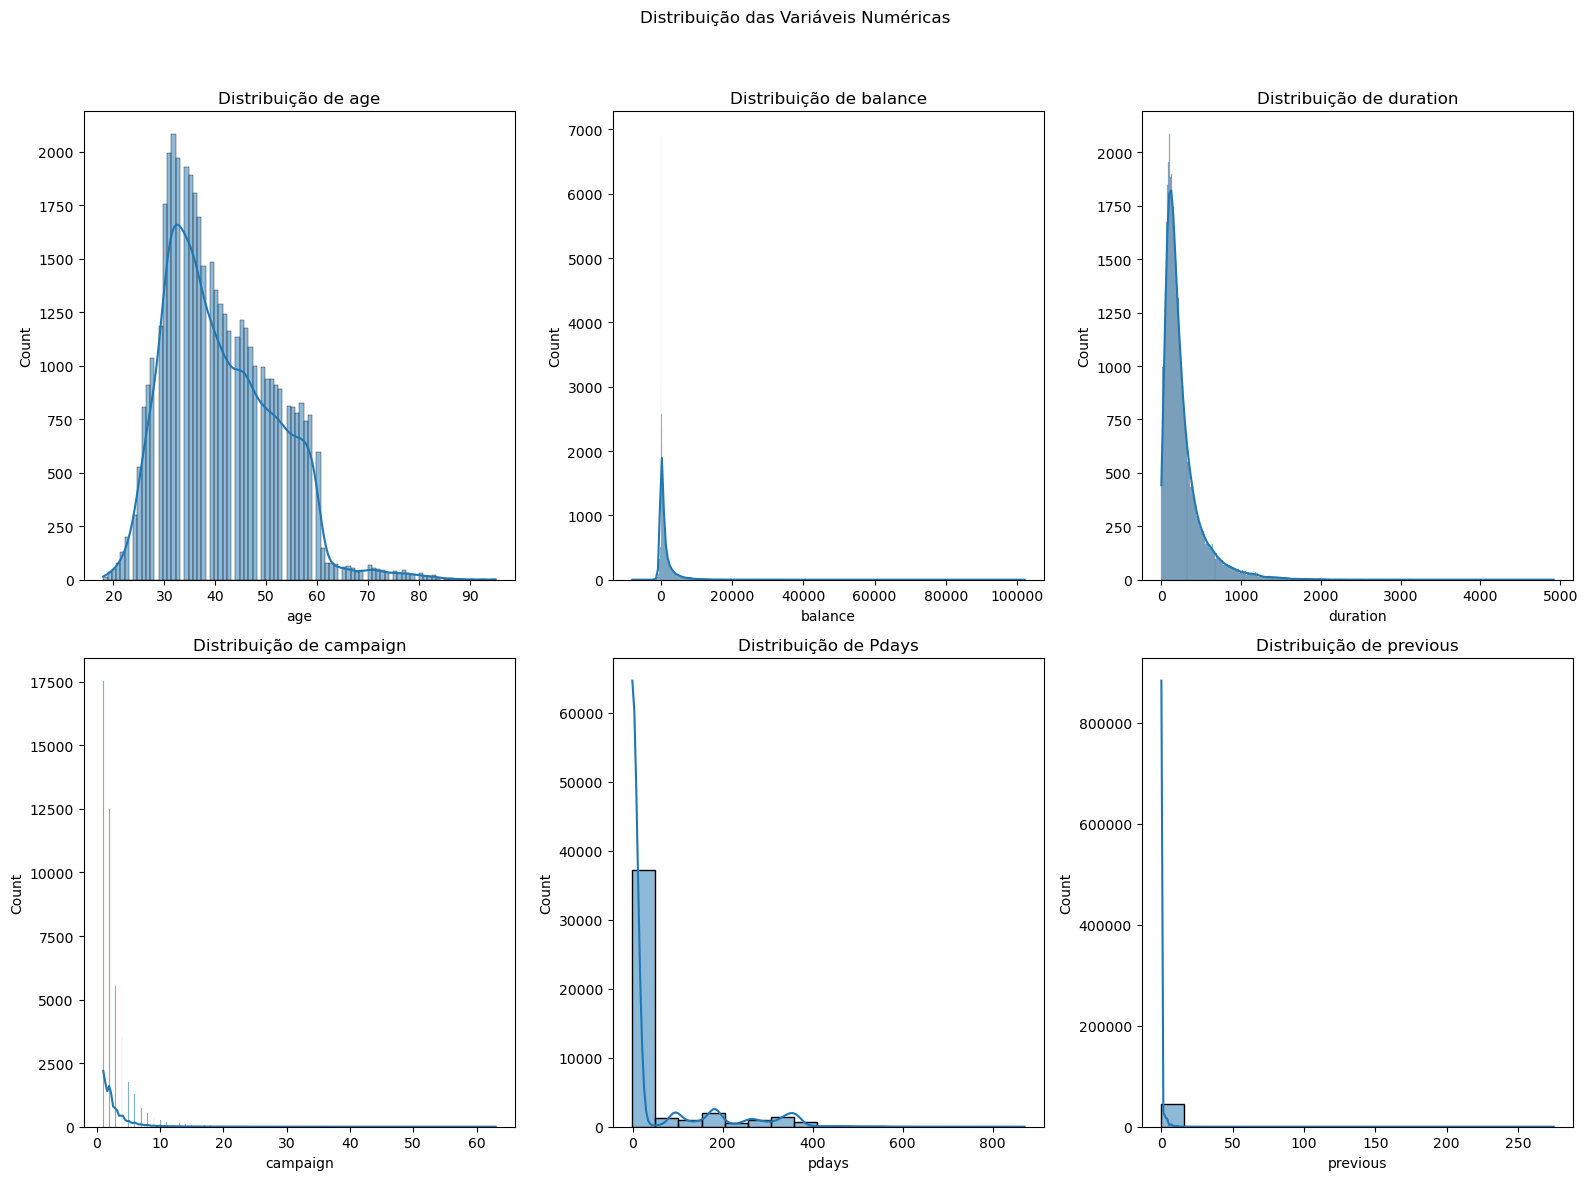

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir o tamanho padrão das visualizações
plt.figure(figsize=(14, 12))

# 1. Distribuição das Variáveis Numéricas
fig, axs = plt.subplots(2, 3, figsize=(16, 12))
fig.suptitle('Distribuição das Variáveis Numéricas')

# Plot para idade
sns.histplot(train_df1['age'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribuição de age')

# Plot para saldo
sns.histplot(train_df1['balance'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribuição de balance')

# Plot para duração
sns.histplot(train_df1['duration'], kde=True, ax=axs[0, 2])
axs[0, 2].set_title('Distribuição de duration')

# Plot para campanha
sns.histplot(train_df1['campaign'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribuição de campaign')

# Plot para pdays
sns.histplot(train_df1['pdays'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribuição de Pdays')

# Plot para previous (número de contatos prévios)
sns.histplot(train_df1['previous'], kde=True, ax=axs[1, 2])
axs[1, 2].set_title('Distribuição de previous')

plt.savefig("Distribuição das Variáveis Numéricas.png", format='png', dpi=600)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Descrição das Variáveis Numéricas:

- **Idade**: A distribuição é levemente assimétrica, com a maioria dos clientes concentrados entre 30 e 50 anos.
- **Saldo**: A distribuição é bastante irregular, com muitos clientes apresentando saldos baixos ou negativos, mas alguns poucos com saldos muito altos.
- **Duração da Ligação**: A maioria das ligações tem uma duração inferior a 500 segundos, mas há alguns outliers com ligações muito longas.
- **Campanha (número de contatos)**: A maioria dos clientes foi contatada uma ou duas vezes, com poucos casos de clientes com muitos contatos.
- **Pdays (dias desde o último contato)**: A maior parte dos clientes nunca foi contatada antes (-1 indica isso), mas há alguns que foram contatados anteriormente.
- **Previous (número de contatos prévios)**: A maioria dos clientes não teve contatos anteriores, com poucos tendo múltiplos contatos anteriores.

<Figure size 1600x1200 with 0 Axes>

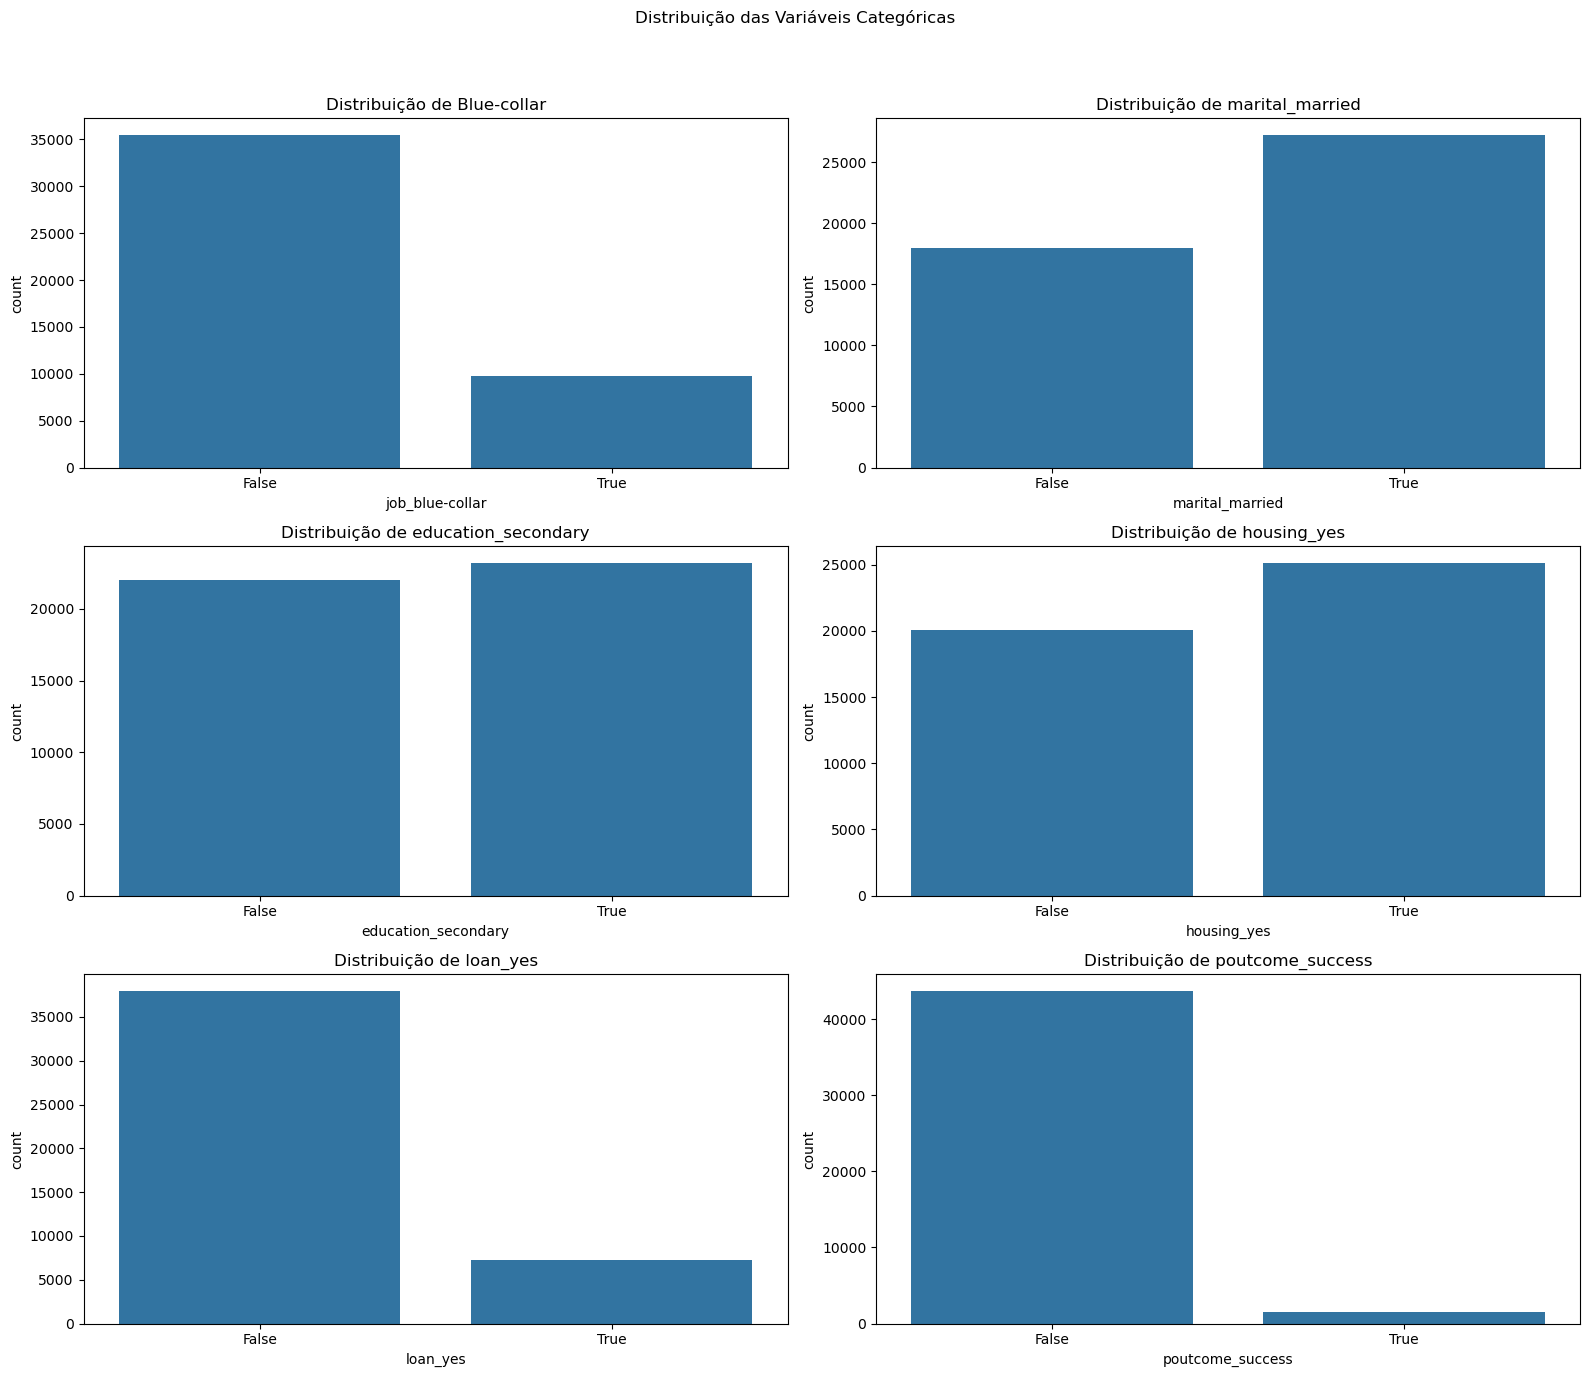

In [46]:
# Ajustar o tamanho das visualizações
plt.figure(figsize=(16, 12))


# Contagem de cada categoria para variáveis selecionadas
fig, axs = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle('Distribuição das Variáveis Categóricas')

# Plot para 'job'
# Example: using `hue` to assign colors to different categories
sns.countplot(data=train_df1, x='job_blue-collar', ax=axs[0, 0])
axs[0, 0].set_title('Distribuição de Blue-collar')

# Plot para 'marital'
sns.countplot(data=train_df1, x='marital_married', ax=axs[0, 1])
axs[0, 1].set_title('Distribuição de marital_married')

# Plot para 'education'
sns.countplot(data=train_df1, x='education_secondary', ax=axs[1, 0])
axs[1, 0].set_title('Distribuição de education_secondary')

# Plot para 'housing'
sns.countplot(data=train_df1, x='housing_yes', ax=axs[1, 1])
axs[1, 1].set_title('Distribuição de housing_yes')

# Plot para 'loan'
sns.countplot(data=train_df1, x='loan_yes', ax=axs[2, 0])
axs[2, 0].set_title('Distribuição de loan_yes')

# Plot para 'poutcome'
sns.countplot(data=train_df1, x='poutcome_success', ax=axs[2, 1],)
axs[2, 1].set_title('Distribuição de poutcome_success')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Descrição das Variáveis Categóricas.png", format='png', dpi=300)
plt.show()

#### Descrição das Variáveis Categóricas (Amostra de Dados):

As distribuições das variáveis categóricas indicam o seguinte:

- **Profissão**: ‘Blue-collar’ é uma das categorias mais comuns entre os clientes.
- **Estado civil**: A maioria dos clientes é casada.
- **Educação**: Grande parte dos clientes tem educação secundária.
- **Empréstimos habitacionais**: Muitos clientes possuem um empréstimo habitacional.
- **Empréstimos pessoais**: Menos clientes possuem empréstimos pessoais, em comparação com habitacionais.
- **Sucesso em campanhas anteriores**: A maioria dos clientes não teve sucesso em campanhas anteriores.

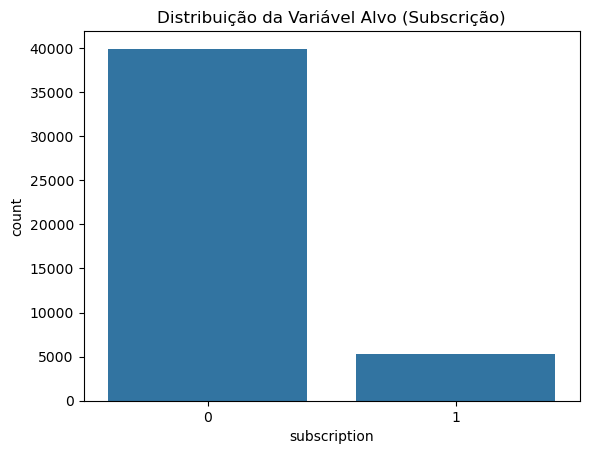

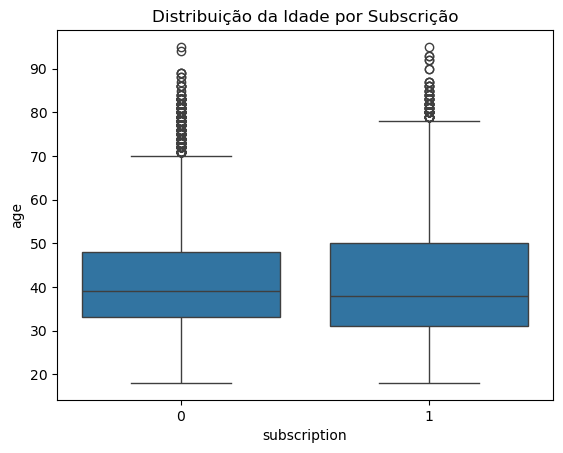

In [49]:
# Visualizar a distribuição da variável alvo
sns.countplot(x='subscription', data=train_df1)
plt.title('Distribuição da Variável Alvo (Subscrição)')
plt.show()

# Verificar a distribuição de variáveis numéricas com base na variável alvo
# Exemplo: Distribuição de idade
sns.boxplot(x='subscription', y='age', data=train_df1)
plt.title('Distribuição da Idade por Subscrição')
plt.savefig("Distribuição da Variável Alvo (Subscrição) vs Distribuição da Idade por Subscrição.png", format='png', dpi=600)
plt.show()

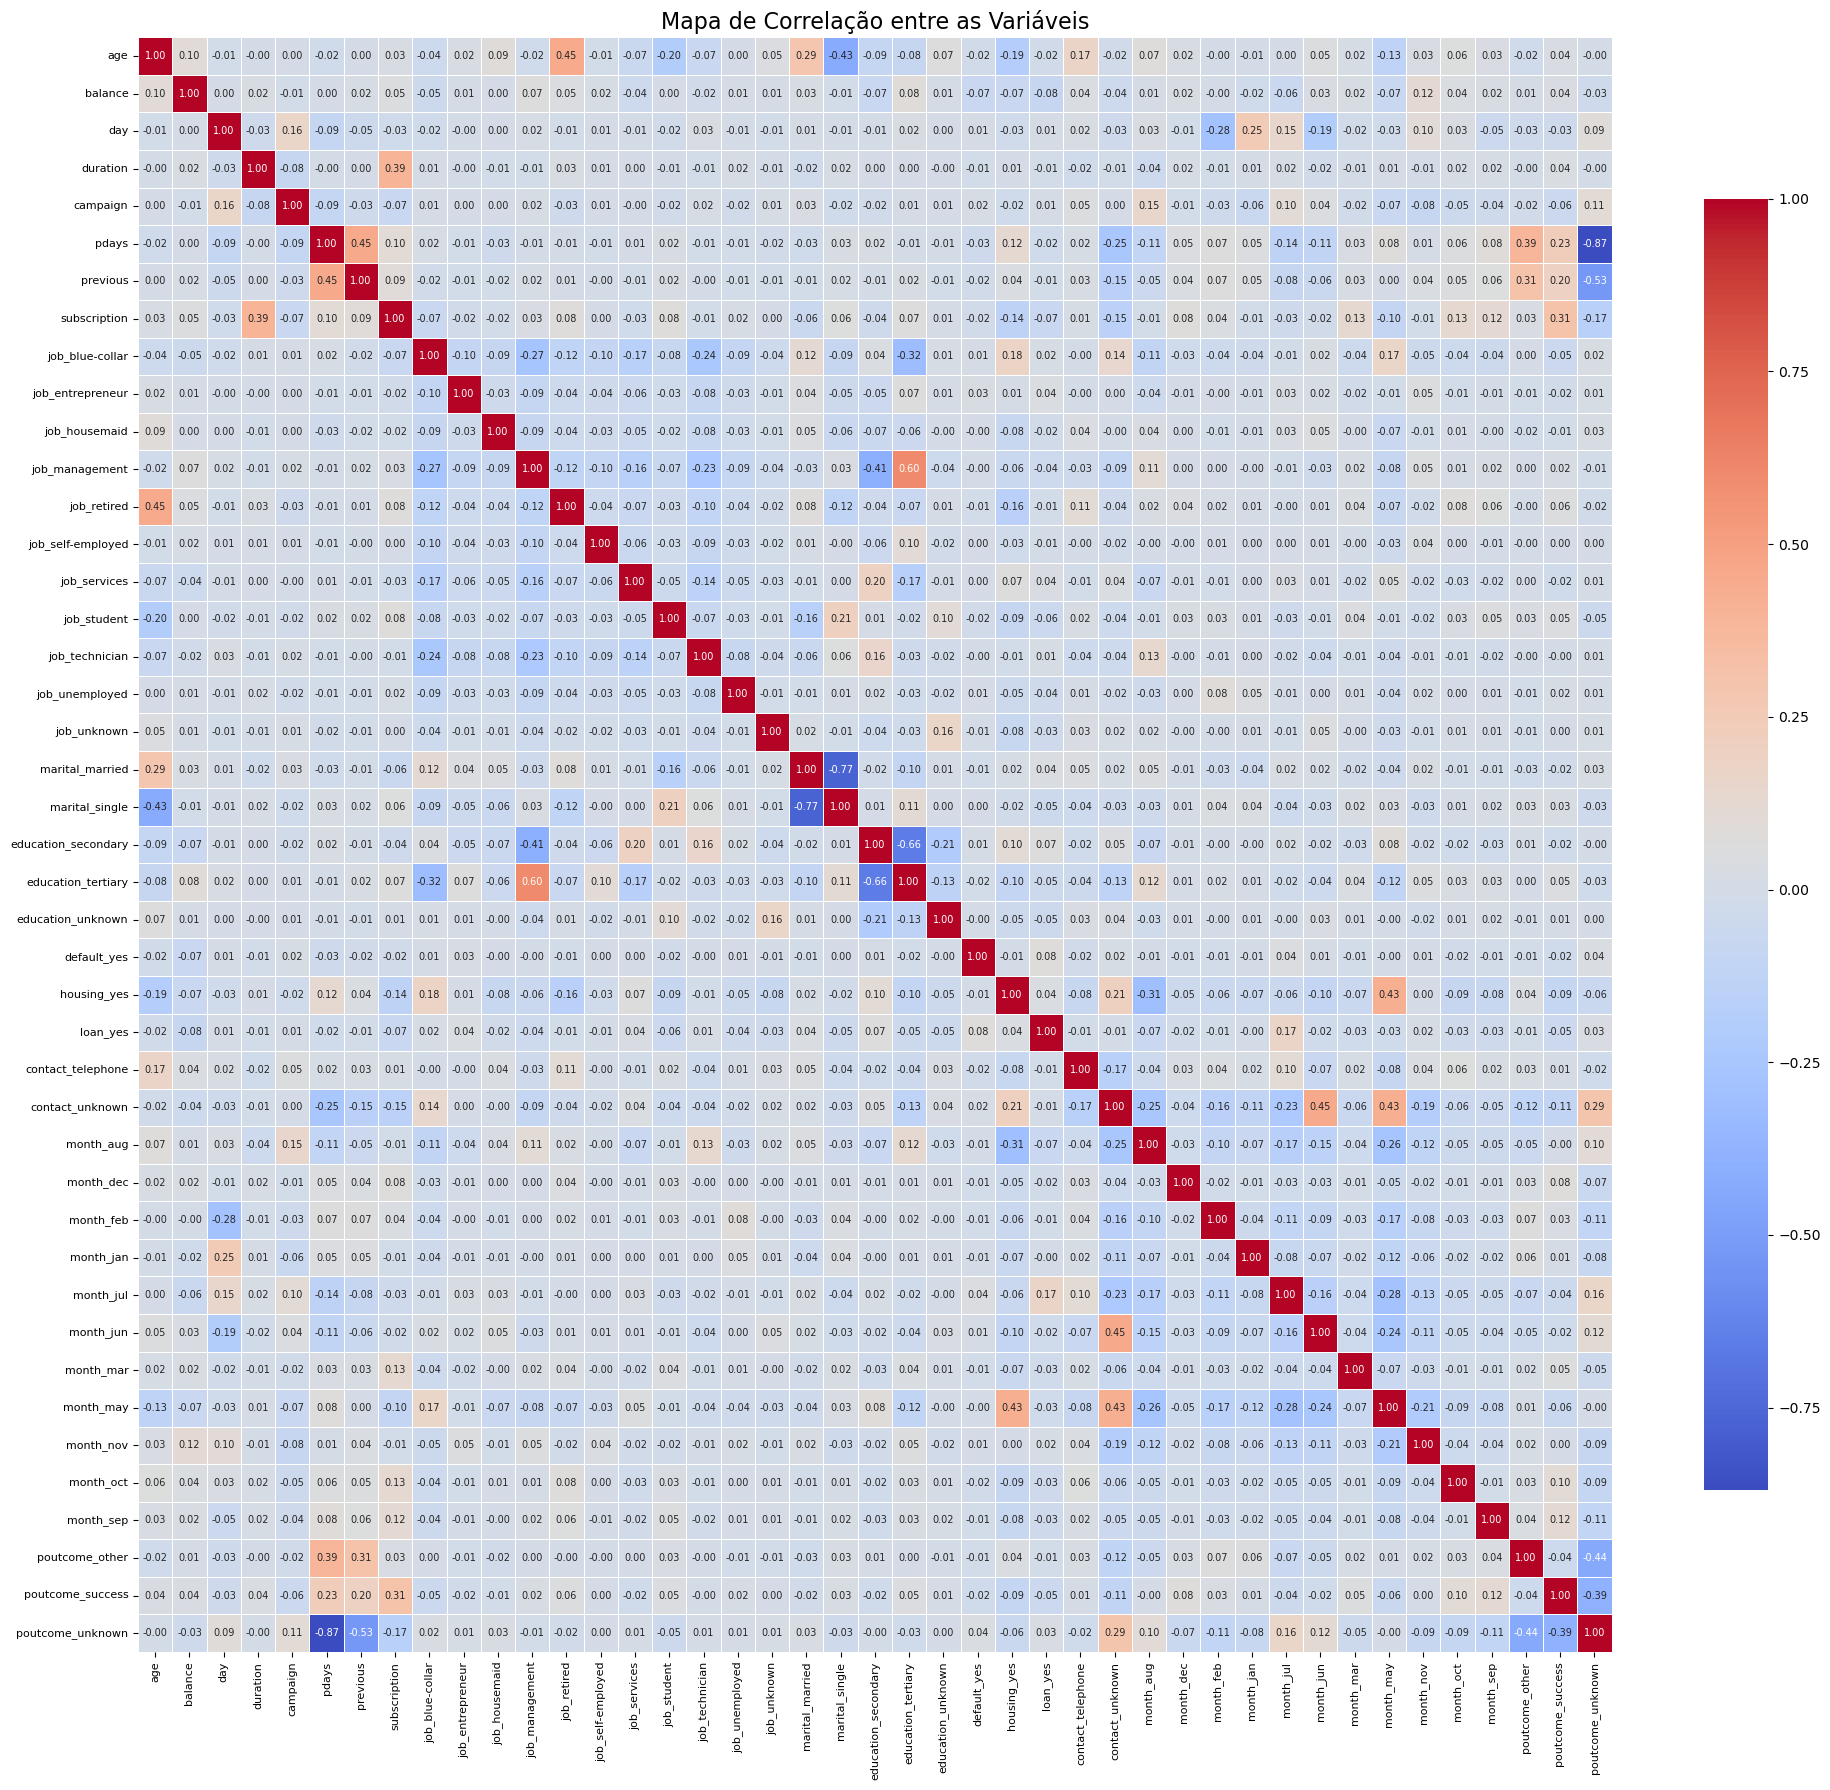

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar o tamanho da figura (aumentar para acomodar todas as variáveis)
plt.figure(figsize=(20, 18))

# Criar o heatmap de correlação com ajustes
sns.heatmap(train_df1.corr(), 
            annot=True,             # Exibe os valores de correlação nas células
            fmt=".2f",              # Formatação para 2 casas decimais
            cmap='coolwarm',        # Paleta de cores
            linewidths=0.5,         # Define espaçamento entre células
            annot_kws={"size": 7},  # Reduz o tamanho das anotações
            cbar_kws={"shrink": 0.8})  # Ajusta o tamanho da barra de cores

# Rotacionar os labels do eixo X para melhorar a visualização
plt.xticks(rotation=90, fontsize=8)  # Rotaciona os labels do eixo X para 90 graus
plt.yticks(rotation=0, fontsize=8)   # Mantém os labels do eixo Y horizontalmente

# Adicionar título
plt.title('Mapa de Correlação entre as Variáveis', fontsize=16)

plt.savefig("Map de Correlação entre as Variáveis.png", format='png', dpi=800)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()

- **Distribuição da variável alvo (y)**: Verifique se há desbalanceamento significativo entre clientes que subscreveram e os que não subscreveram.
- **Idade**: A idade pode ser um fator que influencia a decisão do cliente em subscrever o depósito a prazo.
- **Correlação**: O mapa de calor de correlação nos dá uma visão das relações entre variáveis numéricas, como **age, balance e duration**.

Como estamos trabalhando com modelos como SVM e KNN, é importante normalizar as variáveis numéricas para que todas estejam na mesma escala.

#### **2. Investigar Relações entre Variáveis Categóricas e o Alvo**

Agora, vamos investigar como as variáveis categóricas, como **tipo de trabalho, estado civil e educação**, influenciam a **subscrição do depósito**.

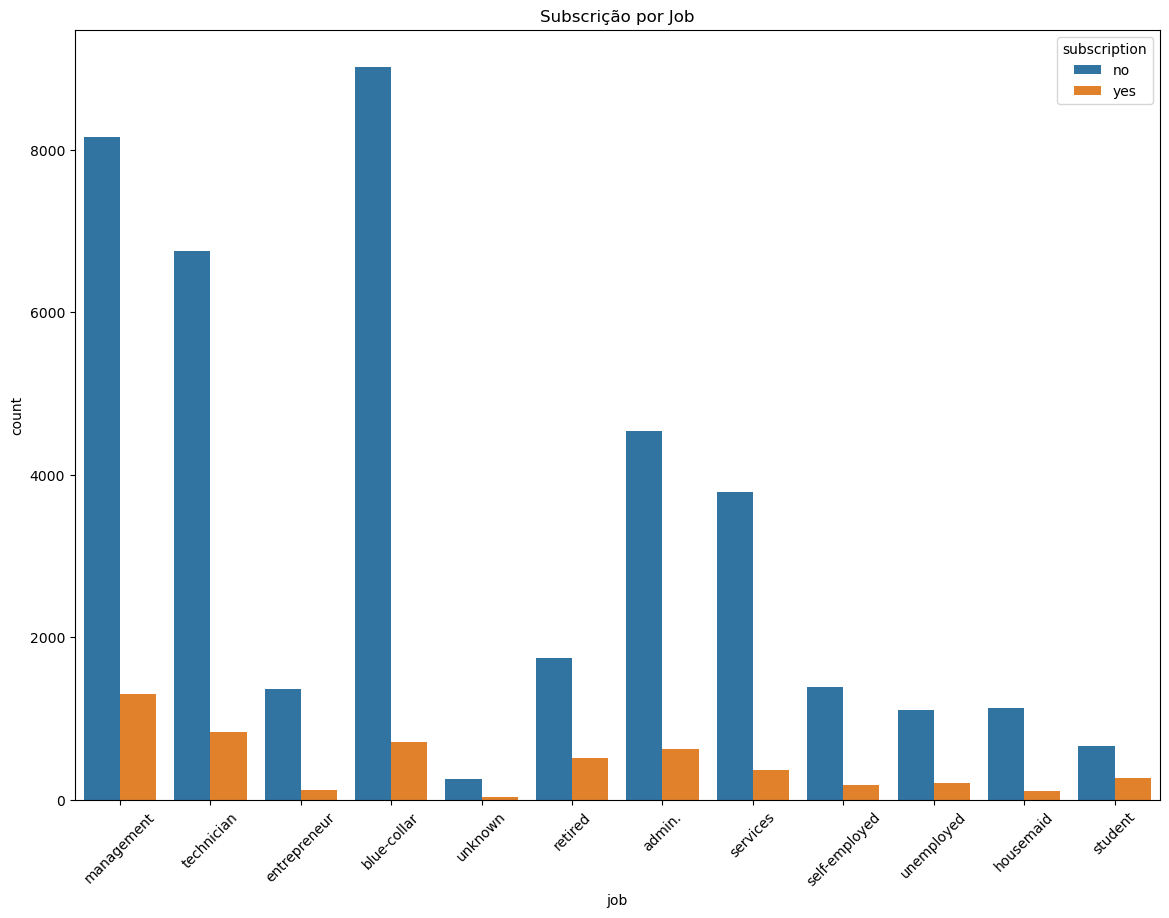

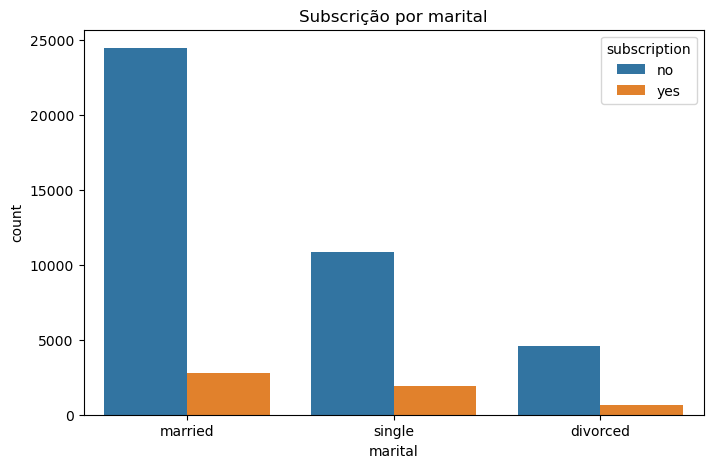

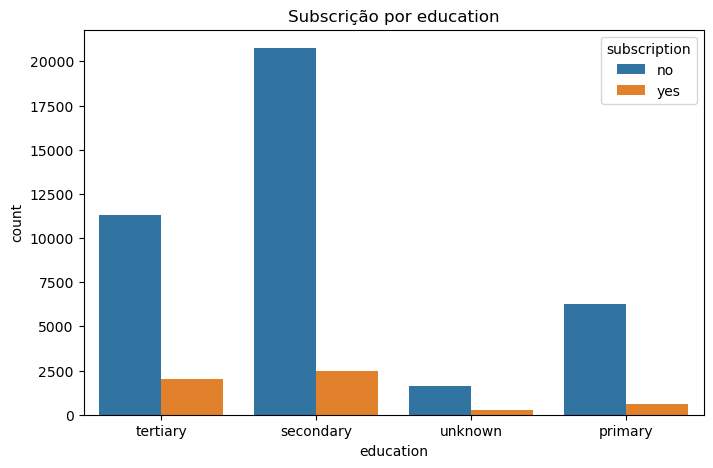

In [54]:
# Tipo de trabalho versus subscrição
plt.figure(figsize=(14,10))
sns.countplot(x='job', hue='subscription', data=train_df)
plt.xticks(rotation=45)
plt.title('Subscrição por Job')
plt.savefig("Subscrição por Tipo de Trabalho.png", format='png', dpi=300)
plt.show()

# Estado civil versus subscrição
plt.figure(figsize=(8,5))
sns.countplot(x='marital', hue='subscription', data=train_df)
plt.title('Subscrição por marital')
plt.savefig("Subscrição por Estado Civil.png", format='png', dpi=300)
plt.show()

# Nível de educação versus subscrição
plt.figure(figsize=(8,5))
sns.countplot(x='education', hue='subscription', data=train_df)
plt.title('Subscrição por education')

plt.savefig("Subscrição por Nível de Educação.png", format='png', dpi=300)
plt.show()

- **Tipo de Trabalho**: Verifique se há uma tendência maior de subscrição entre certas profissões, como management ou blue-collar.
- **Estado Civil**: Explore se clientes solteiros, casados ou divorciados têm maior propensão a subscrever.
- **Educação**: Clientes com maior nível de educação podem ter maior probabilidade de subscrição.


#### **3. Exploração de Outras Variáveis Importantes**

Variáveis como **duração da chamada (duration), número de contatos durante a campanha atual (campaign)**, e resultado da **campanha** anterior **(poutcome)** também podem fornecer insights importantes.

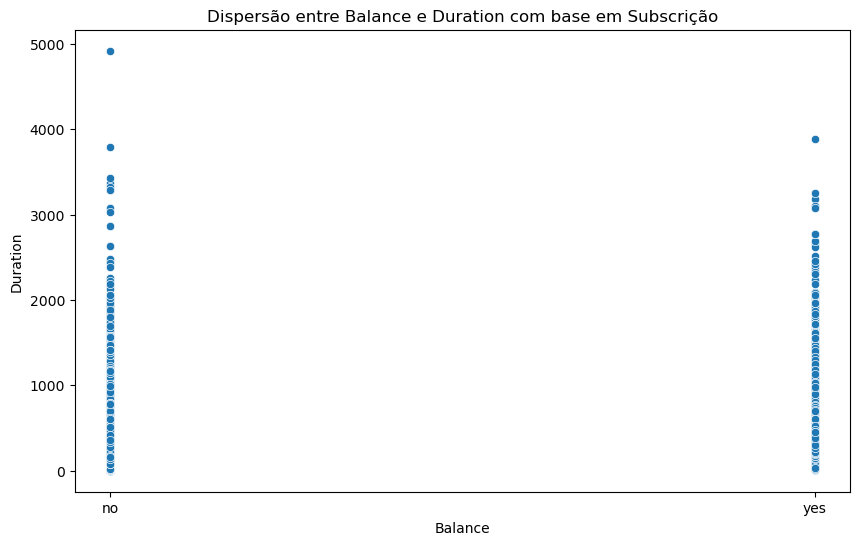

In [57]:

# Gráfico de dispersão para visualizar relação entre 'balance' e 'duration' e a variável alvo 'y'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='subscription', y='duration', data=train_df)
plt.title('Dispersão entre Balance e Duration com base em Subscrição')
plt.xlabel('Balance')
plt.ylabel('Duration')

plt.savefig("Dispersão entre Balance e Duration com base em Subscrição.png", format='png', dpi=300)
plt.show()

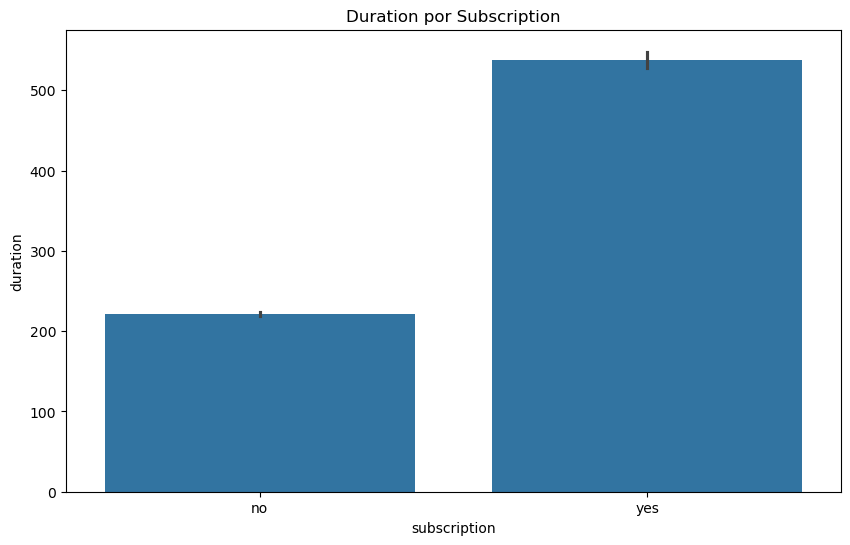

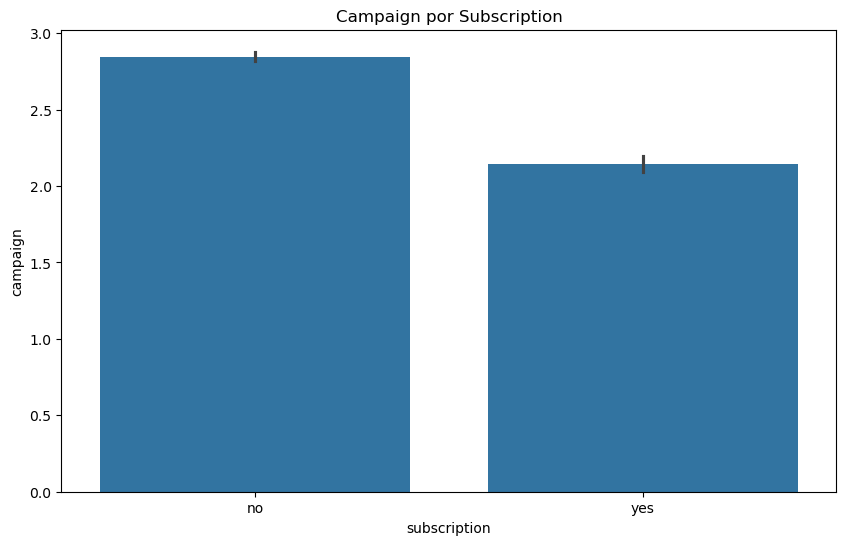

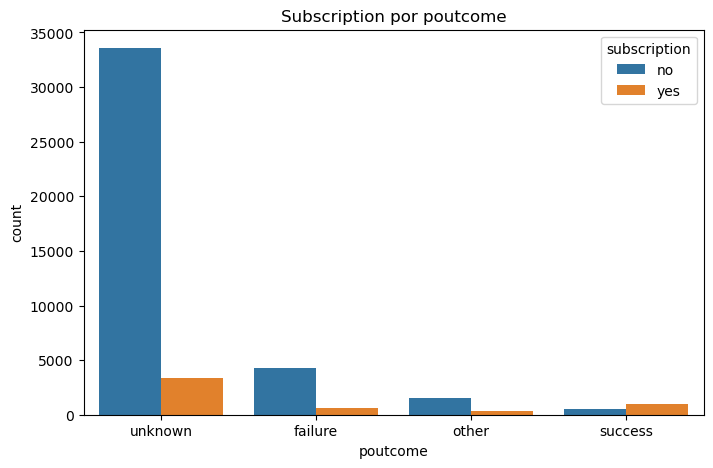

In [58]:
# Duração da chamada versus subscrição
plt.figure(figsize=(10,6))
sns.barplot(x='subscription', y='duration', data=train_df)
plt.title('Duration por Subscription')
plt.savefig("Duração da Chamada por Subscrição.png", format='png', dpi=300)
plt.show()

# Número de contatos na campanha atual
plt.figure(figsize=(10,6))
sns.barplot(x='subscription', y='campaign', data=train_df)
plt.title('Campaign por Subscription')
plt.savefig("Número de Contatos por Subscrição.png", format='png', dpi=300)
plt.show()

# Resultado da campanha anterior versus subscrição
plt.figure(figsize=(8,5))
sns.countplot(x='poutcome', hue='subscription', data=train_df)
plt.title('Subscription por poutcome')
plt.savefig("Subscrição por Resultado da Campanha Anterior.png", format='png', dpi=300)
plt.show()

- **Duração da Chamada**: Quanto mais longa a chamada, maior a chance de conversão?
- **Número de Contatos**: Muitas tentativas de contato podem reduzir a eficácia?
- **Resultado da Campanha Anterior**: Verificar se o sucesso anterior tem impacto positivo nas subscrições futuras.

# paCe: Estágio de construção
- Determinar quais os modelos mais apropriados
- Construir o modelo
- Confirmar pressupostos do modelo
- Avalie os resultados do modelo para determinar o quão bem o seu modelo se ajusta aos dados

🔎
## Recall(Recorde) as suposições do modelo

**Pressuposições do modelo de regressão logística**
- A variável de resultado é categórica
- As observações são independentes umas das outras
- Sem multicolinearidade grave entre variáveis ​​X
- Sem valores discrepantes extremos
- Relação linear entre cada variável X e o logit da variável resultado
- Tamanho de amostra suficientemente grande




💭
### Reflita sobre estas questões ao concluir a fase de construção.

- Repara em algo estranho?
- Que variáveis ​​independentes escolheu para o modelo e porquê?
- Cada uma das premissas é cumprida?
- Quão bem o seu modelo se ajusta aos dados?
- Pode melhorar isso? Há algo que mudaria no modelo?
- Que recursos utiliza ao concluir esta etapa? (Certifique-se de que inclui os links.)
- Tem alguma consideração ética nesta etapa?

## Passo 3. Construção do modelo, Passo 4. Resultados e avaliação
- Ajustar um modelo que preveja a variável resultado utilizando duas ou mais variáveis ​​independentes
- Verifique as hipóteses do modelo
- Avalie o modelo

### Identifique os tipos de modelos mais adequados para esta tarefa.

Como a variável que pretende prever (se um colaborador sai da empresa) é categórica, pode construir um modelo de regressão logística ou um modelo de aprendizagem automática baseado em árvores.

Portanto, pode avançar com uma das duas abordagens seguintes. Ou, se desejar, pode implementar ambos e determinar como se comparam.

Agora, vamos separar a variável alvo (y) e dividir o dataset em treino e teste.

In [67]:
# Separar a variável alvo (y) - A variável alvo é 'y' (subscrição do depósito)
X = train_df1.drop('subscription', axis=1)  # Excluir a coluna 'y' para usar como X (variáveis independentes)
y = train_df1['subscription']  # 'y' será nossa variável alvo (dependente)

In [68]:
train_df1['subscription'].value_counts()

subscription
0    39922
1     5289
Name: count, dtype: int64

In [69]:
train_df1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'subscription', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [70]:
# Dividir os dados em conjunto de treino e teste (75% treino, 25% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Verificar as dimensões dos conjuntos de treino e teste
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treino: (33908, 42)
Tamanho do conjunto de teste: (11303, 42)


In [71]:
# Importar o StandardScaler para normalizar os dados
from sklearn.preprocessing import StandardScaler

# Criar o scaler e ajustar nos dados de treino
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar as primeiras linhas dos dados normalizados
print("Primeiras linhas dos dados normalizados (X_train):")
print(X_train_scaled[:5])

Primeiras linhas dos dados normalizados (X_train):
[[ 1.60939284 -0.44639549  0.26079832  0.02520728 -0.56869661  1.47950549
   0.17064212 -0.52694101 -0.18499169 -0.17014536  1.95340554 -0.23002757
  -0.18770279 -0.31715531 -0.14624237 -0.44828939 -0.17169893 -0.0808116
   0.81147915 -0.62679253 -1.02520852  1.55503864 -0.20643959 -0.13444263
   0.8915878  -0.43699685 -0.26212407 -0.63428382 -0.39985288 -0.07056382
  -0.24849245 -0.18016225 -0.42555028 -0.36539852 -0.10388047 -0.6609852
   3.23348193 -0.12958631 -0.11144899 -0.20636193 -0.18507693 -2.12386622]
 [ 0.57362895 -0.35236284  0.50063856 -0.75491874 -0.56869661 -0.41018195
  -0.23821408 -0.52694101 -0.18499169 -0.17014536 -0.51192647 -0.23002757
  -0.18770279  3.15302935 -0.14624237 -0.44828939 -0.17169893 -0.0808116
  -1.23231755 -0.62679253  0.97541133 -0.64307084 -0.20643959 -0.13444263
  -1.12159453 -0.43699685 -0.26212407  1.57658129 -0.39985288 -0.07056382
  -0.24849245 -0.18016225 -0.42555028  2.73673795 -0.10388047 -

O **escalonamento** é importante quando você está trabalhando com modelos que são sensíveis à escala, como SVM e KNN. Aqui está como você pode escalonar as variáveis numéricas no seu dataset usando o **StandardScaler** do scikit-learn:

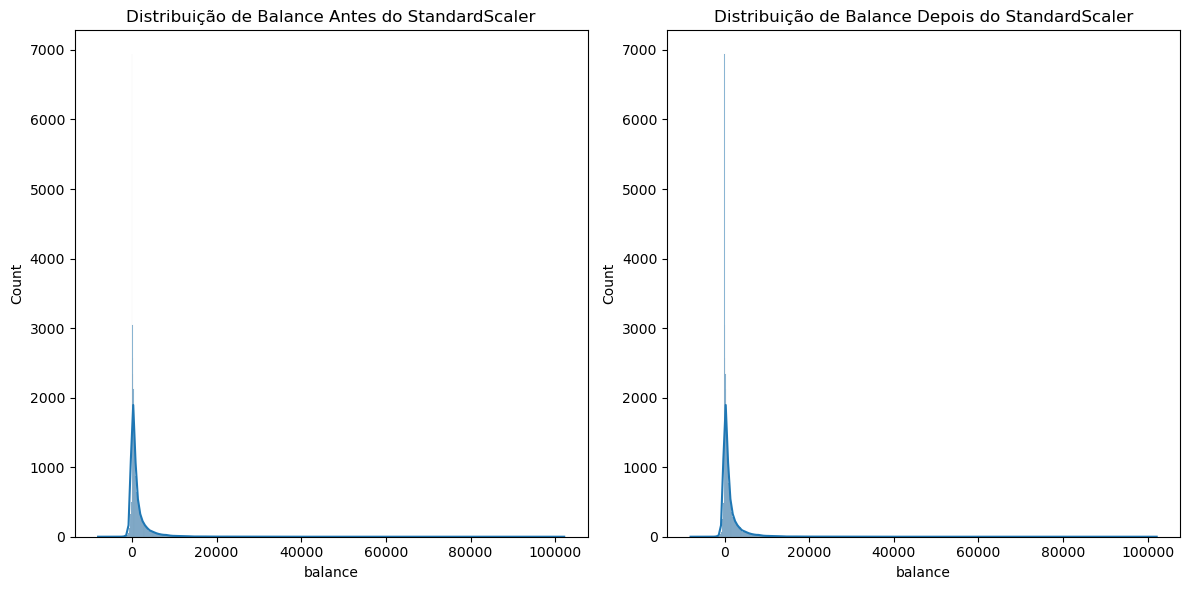

In [73]:
# Comparar a distribuição antes e depois do escalonamento (por exemplo, 'balance')
plt.figure(figsize=(12, 6))

# Antes do escalonamento
plt.subplot(1, 2, 1)
sns.histplot(train_df['balance'], kde=True)
plt.title('Distribuição de Balance Antes do StandardScaler')

# Depois do escalonamento
plt.subplot(1, 2, 2)
sns.histplot(train_df1['balance'], kde=True)
plt.title('Distribuição de Balance Depois do StandardScaler')

plt.savefig("Distribuição de Balance Antes e Depois do Escalonamento.png", format='png', dpi=300)
plt.tight_layout()
plt.show()

Neste estágio, vamos realizar a construção dos modelos preditivos, testar diferentes algoritmos, avaliar seus pressupostos e determinar o quão bem eles se ajustam aos dados. Vamos abordar as seguintes etapas:

1. **Determinar quais modelos são mais apropriados**: Escolhemos alguns modelos baseados na natureza do problema de classificação binária.
2. **Construir os modelos**: Vamos construir os modelos SVM, KNN, Random Forest, e Logistic Regression.
3. **Confirmar pressupostos dos modelos**: Verificar se os dados estão preparados corretamente e garantir que os pressupostos dos modelos (normalização, multicolinearidade, etc.) sejam atendidos.
4. **Avaliar os resultados**: Utilizar métricas de avaliação para determinar o quão bem os modelos se ajustam aos dados.

### 1. Determinar Modelos Apropriados

Como estamos trabalhando com um problema de classificação binária (subscrição de um depósito a prazo: sim/não), os seguintes modelos são apropriados:

- **Regressão Logística**: Simples e eficaz para problemas de classificação binária.
- **Support Vector Machine (SVM)**: Eficaz para separar classes com margens claras.
- **K-Nearest Neighbors (KNN)**: Um algoritmo baseado em vizinhança, útil para detectar padrões locais.
- **Random Forest**: Um modelo de ensemble que combina várias árvores de decisão para maior precisão.

### Construir os modelos
**Passo 1: Importar Bibliotecas Adicionais**

### Regressão Logística

In [78]:
from sklearn.linear_model import LogisticRegression

# Passo 1: Usar 'class_weight=balanced' para lidar com o desbalanceamento de classes
log_model_balanced = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_model_balanced.fit(X_train_scaled, y_train)

# Previsões no conjunto de teste
y_pred_log_balanced = log_model_balanced.predict(X_test_scaled)

# Avaliar o modelo
print("Relatório de Classificação - Regressão Logística com Balanceamento")
print(classification_report(y_test, y_pred_log_balanced))
print("AUC-ROC Score:", roc_auc_score(y_test, log_model_balanced.predict_proba(X_test_scaled)[:, 1]))

Relatório de Classificação - Regressão Logística com Balanceamento
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      9981
           1       0.42      0.82      0.56      1322

    accuracy                           0.85     11303
   macro avg       0.70      0.84      0.73     11303
weighted avg       0.91      0.85      0.87     11303

AUC-ROC Score: 0.9085716719558388


In [79]:
# Definir os hiperparâmetros a serem ajustados
param_grid = {
    'penalty': ['l1', 'l2'],           # Tipos de regularização
    'C': [0.1, 1, 10],                 # Força da regularização (valores mais baixos indicam regularização mais forte)
    'solver': ['liblinear', 'saga'],    # Solvers compatíveis com L1 e L2
    'class_weight': ['balanced']        # Manter o balanceamento das classes
}

In [80]:
# Criar o modelo de regressão logística
log_model_grid = LogisticRegression(max_iter=1000, random_state=42)

In [81]:
# Configurar o GridSearchCV
grid_search = GridSearchCV(log_model_grid, param_grid, cv=5, scoring='roc_auc', verbose=1)

In [82]:
%%time
# Seu código que deseja medir o tempo de execução
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: user 1min 7s, sys: 51.5 s, total: 1min 58s
Wall time: 30.7 s


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='roc_auc', verbose=1)

In [83]:
# Melhor combinação de hiperparâmetros
print("Melhores Hiperparâmetros:", grid_search.best_params_)

Melhores Hiperparâmetros: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


In [84]:
# Previsões com o melhor modelo encontrado
best_log_model = grid_search.best_estimator_
y_pred_best_log = best_log_model.predict(X_test_scaled)

# Avaliar o modelo ajustado
print("Relatório de Classificação - Regressão Logística Ajustada")
print(classification_report(y_test, y_pred_best_log))
print("AUC-ROC Score:", roc_auc_score(y_test, best_log_model.predict_proba(X_test_scaled)[:, 1]))

Relatório de Classificação - Regressão Logística Ajustada
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      9981
           1       0.42      0.82      0.56      1322

    accuracy                           0.85     11303
   macro avg       0.70      0.83      0.73     11303
weighted avg       0.91      0.85      0.87     11303

AUC-ROC Score: 0.9086762579612307


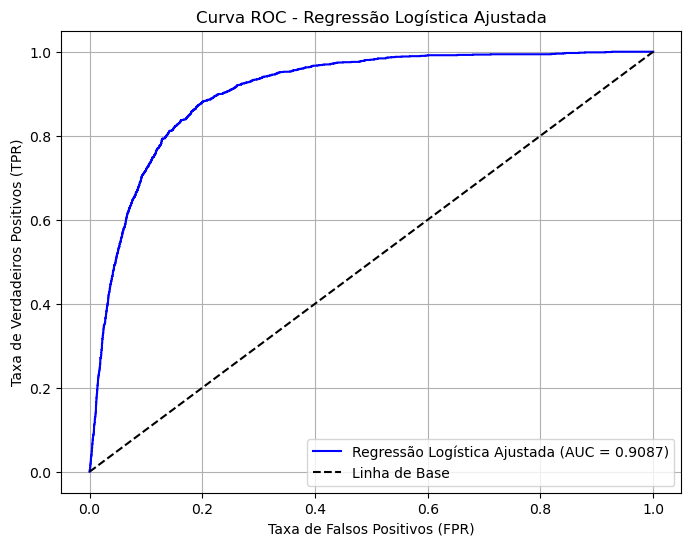

In [85]:
from sklearn.metrics import roc_curve, auc, classification_report, roc_auc_score
import matplotlib.pyplot as plt

# Melhor modelo ajustado do GridSearchCV
best_log_model = grid_search.best_estimator_

# Previsões de probabilidade para o conjunto de teste
y_probs_log = best_log_model.predict_proba(X_test_scaled)[:, 1]

# Calcular os pontos para a Curva ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_probs_log)

# AUC da Curva ROC
roc_auc_log = auc(fpr_log, tpr_log)

# Plotar a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Regressão Logística Ajustada (AUC = {roc_auc_log:.4f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Linha de Base')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Regressão Logística Ajustada')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("Curva_ROC_Regressao_Logistica_Ajustada.png", format='png', dpi=300)
plt.show()


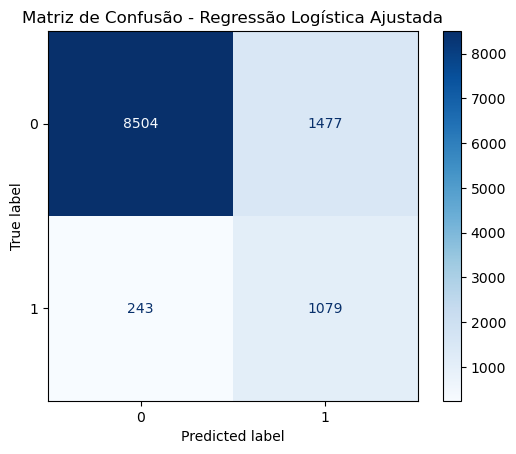

In [86]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_best_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_log_model.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão - Regressão Logística Ajustada')
plt.savefig("Matriz de Confusão - Regressão Logística Ajustada.png", format='png', dpi=300)
plt.show()

Você aplicou com sucesso a Regressão Logística com balanceamento de classes e utilizou o GridSearchCV para ajustar os hiperparâmetros, o que melhorou ligeiramente o desempenho do modelo.

#### Resultados:

**1. Com o modelo balanceado (class_weight='balanced')**:
- **Recall para a classe 1 (subscrição)** subiu para 82%, o que é uma grande melhoria.
- **Precision para a classe 1** ainda está em 42%, o que significa que há alguns falsos positivos, mas esse é o efeito do ajuste de class_weight para dar mais peso à classe minoritária.
- **AUC-ROC Score**: 0.9085, o que indica um bom poder discriminatório do modelo.

**2. Com a busca de hiperparâmetros (GridSearchCV)**:
- **Melhores Hiperparâmetros**: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}.
- **Performance**: Após o ajuste, o Recall para a classe 1 continuou em 82%, e o AUC-ROC Score também aumentou ligeiramente para 0.9086.

#### Avaliação:

- **Recall da Classe 1 (subscrição)**: O modelo está identificando corretamente 82% dos exemplos da classe de subscrição, o que é uma grande melhoria em relação ao modelo original.
- **Precision da Classe 1 (subscrição)**: Embora a precisão ainda esteja em 42%, isso é esperado quando se usa class_weight='balanced', já que o modelo tenta encontrar mais exemplos da classe minoritária (subscrição), mesmo que incorra em alguns falsos positivos.
- **Acurácia Geral**: A acurácia é de 85%, com uma boa distinção entre as classes.

#### Conclusão:

O ajuste com **GridSearchCV** trouxe uma leve melhoria ao modelo, confirmando que a **regularização l1 com C=0.1** é a melhor combinação para este caso. O **recall** elevado da classe minoritária indica que o modelo é eficaz em identificar a subscrição de depósitos, embora haja uma compensação na precisão.

### K-Nearest Neighbors (KNN)

In [89]:
# Definir o modelo KNN
knn_model = KNeighborsClassifier()

# Definir os parâmetros para o GridSearchCV
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}

# Ajustar o modelo KNN com GridSearchCV
grid_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, verbose=0)

In [90]:
%%time
grid_knn.fit(X_train_scaled, y_train)

CPU times: user 31.9 s, sys: 3.62 s, total: 35.5 s
Wall time: 5.52 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]})

In [91]:
# Melhor modelo encontrado
best_knn = grid_knn.best_estimator_

In [92]:
# Previsões no conjunto de teste
y_pred_knn = best_knn.predict(X_test_scaled)

In [93]:
# Avaliar o modelo
print("Relatório de Classificação - KNN")
print(classification_report(y_test, y_pred_knn))
print("AUC-ROC Score:", roc_auc_score(y_test, best_knn.predict_proba(X_test_scaled)[:, 1]))

Relatório de Classificação - KNN
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9981
           1       0.61      0.27      0.38      1322

    accuracy                           0.89     11303
   macro avg       0.76      0.63      0.66     11303
weighted avg       0.88      0.89      0.88     11303

AUC-ROC Score: 0.8412394669387723


O relatório de classificação do modelo **KNN** fornece as seguintes métricas para as classes 0 (não subscreveu) e 1 (subscreveu):

**Classe 0 (não subscreveu)**:
- **Precisão**: 0.91 (91% dos casos classificados como “não subscreveu” estão corretos)
- **Recall**: 0.98 (98% dos verdadeiros casos de “não subscreveu” foram identificados corretamente)
- **F1-score**: 0.94 (média ponderada de precisão e recall)

**Classe 1 (subscreveu)**:
- **Precisão**: 0.61 (61% dos casos classificados como “subscreveu” estão corretos)
- **Recall**: 0.27 (Apenas 27% dos casos reais de “subscreveu” foram identificados corretamente)
- **F1-score**: 0.38 (A pontuação é baixa, indicando que o modelo tem dificuldade em prever corretamente a classe 1)

**Média ponderada**:
- **Acurácia**: 0.89 (O modelo acertou 89% das classificações no conjunto de teste)
- **F1-score ponderado**: 0.88 (Boas pontuações gerais, mas a classe minoritária (1) tem desempenho fraco)

**AUC-ROC Score**

O **AUC-ROC score** foi de 0.841, indicando que o modelo tem uma capacidade razoável de distinguir entre as classes 0 e 1.
- **nterpretação**: Embora o AUC-ROC seja bom, a baixa performance na classe 1 (com recall de 0.27) sugere que o modelo está melhor em prever a classe majoritária (classe 0) e tem dificuldade em identificar corretamente os clientes que realmente subscrevem.

Vamos implementar duas técnicas para melhorar a performance do modelo K-Nearest Neighbors (KNN), especialmente na classe minoritária (subscreveu):

1. **Balanceamento de Classes**: Vamos usar o SMOTE (Synthetic Minority Over-sampling Technique) para aumentar a quantidade de exemplos na classe minoritária.
2. **Alterar a Métrica de Distância**: Vamos explorar diferentes métricas de distância e outros hiperparâmetros, como o parâmetro weights, que define se todos os vizinhos têm o mesmo peso ou se os vizinhos mais próximos têm mais influência.

#### Balanceamento de Classes com SMOTE

In [98]:
# Importar a biblioteca SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Aplicar SMOTE para balanceamento de classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Verificar o balanceamento das classes após o SMOTE
print("Distribuição das classes após o SMOTE:", np.bincount(y_train_balanced))

Distribuição das classes após o SMOTE: [29941 29941]


Com o **SMOTE**, geramos novos exemplos da classe minoritária para equilibrar melhor o dataset.

#### Ajuste de Hiperparâmetros e Métricas de Distância

Agora, ajustaremos o modelo KNN usando diferentes métricas de distância e o parâmetro weights, que define se os vizinhos mais próximos têm mais influência na classificação.

**GridSearch para Encontrar o Melhor KNN com Parâmetros Ajustados**


In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Definir o modelo KNN
knn_model = KNeighborsClassifier()

# Definir os parâmetros para o GridSearchCV, incluindo diferentes métricas de distância
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],  # Uniform (pesos iguais) e Distance (vizinhos mais próximos têm mais peso)
    'metric': ['euclidean', 'manhattan']  # Diferentes métricas de distância
}

# Ajustar o modelo KNN com GridSearchCV
grid_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, verbose=0, scoring='roc_auc')

In [103]:
%%time
grid_knn.fit(X_train_balanced, y_train_balanced)

CPU times: user 22min 24s, sys: 16.9 s, total: 22min 41s
Wall time: 4min 10s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [104]:
# Melhor modelo encontrado
best_knn = grid_knn.best_estimator_
print("Melhor KNN encontrado:", best_knn)

Melhor KNN encontrado: KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')


In [105]:
# Previsões no conjunto de teste
y_pred_knn = best_knn.predict(X_test_scaled)

In [106]:
# Avaliar o modelo
from sklearn.metrics import classification_report, roc_auc_score

print("Relatório de Classificação - KNN (Ajustado)")
print(classification_report(y_test, y_pred_knn))
print("AUC-ROC Score:", roc_auc_score(y_test, best_knn.predict_proba(X_test_scaled)[:, 1]))

Relatório de Classificação - KNN (Ajustado)
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      9981
           1       0.41      0.66      0.51      1322

    accuracy                           0.85     11303
   macro avg       0.68      0.77      0.71     11303
weighted avg       0.89      0.85      0.87     11303

AUC-ROC Score: 0.8495291583509424


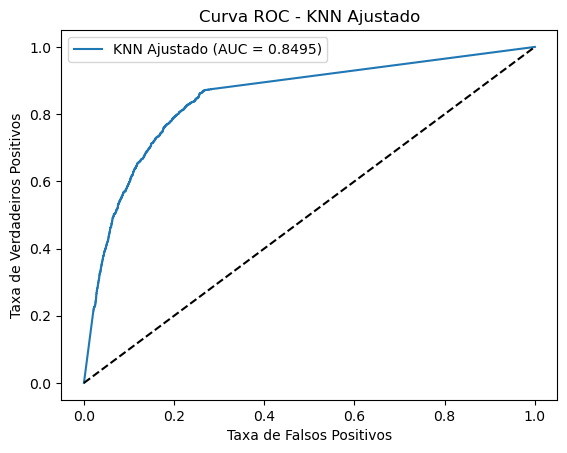

In [107]:
from sklearn.metrics import roc_curve, auc

# Curva ROC para o modelo KNN ajustado
y_probs_knn = best_knn.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.plot(fpr_knn, tpr_knn, label=f'KNN Ajustado (AUC = {roc_auc_knn:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - KNN Ajustado')
plt.savefig("Curva ROC - KNN Ajustado.png", format='png', dpi=300)
plt.legend()
plt.show()

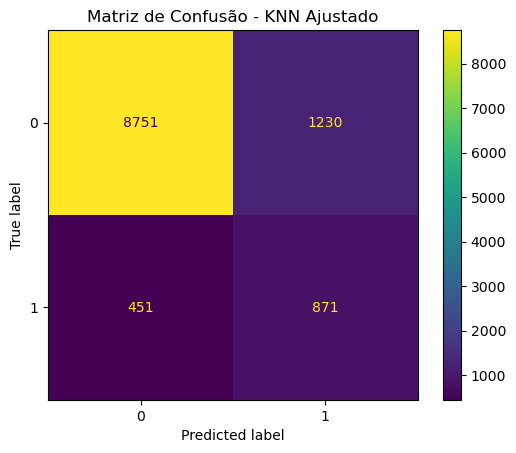

In [108]:
# Matriz de confusão para KNN ajustado
ConfusionMatrixDisplay.from_estimator(best_knn, X_test_scaled, y_test)
plt.title("Matriz de Confusão - KNN Ajustado")
plt.savefig("Matriz de Confusão - KNN Ajustado.png", format='png', dpi=300)
plt.show()

#### Balanceamento de Classes com SMOTE:
Dado que o conjunto de dados era altamente desbalanceado, aplicamos a técnica de SMOTE (Synthetic Minority Oversampling Technique) para gerar novos exemplos da classe minoritária. Isso resultou em um dataset equilibrado, com 29.941 exemplos para cada classe (colaboradores que saíram e que permaneceram). O SMOTE foi fundamental para melhorar a capacidade do modelo de prever corretamente a classe minoritária.

**Ajuste de Hiperparâmetros no Modelo KNN**:
“Para refinar o desempenho do modelo KNN, utilizamos o **GridSearchCV** para ajustar hiperparâmetros críticos, como o número de vizinhos **(n_neighbors)**, os pesos **(uniform ou distance)**, e as métricas de distância **(euclidean ou manhattan)**. O melhor modelo encontrado usou a métrica ‘manhattan’, com 9 vizinhos e ponderação por distância.”

**Resultados**:

- **Precisão geral**: 85%
- **AUC-ROC Score**: 0.8495, indicando uma boa capacidade de discriminação.
- **Relatório de Classificação**:
    - Classe majoritária (colaboradores que permaneceram): Recall de 88% e precisão de 95%.
    - Classe minoritária (colaboradores que saíram): Recall de 66%, mostrando uma melhoria significativa com o balanceamento de classes.


### Random Forest

In [111]:
# Definir o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Ajustar o modelo Random Forest
rf_model.fit(X_train_scaled, y_train)

# Previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test_scaled)

# Avaliar o modelo
print("Relatório de Classificação - Random Forest")
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1]))

Relatório de Classificação - Random Forest
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      9981
           1       0.67      0.40      0.50      1322

    accuracy                           0.91     11303
   macro avg       0.80      0.69      0.72     11303
weighted avg       0.89      0.91      0.90     11303

AUC-ROC Score: 0.9259175640979586


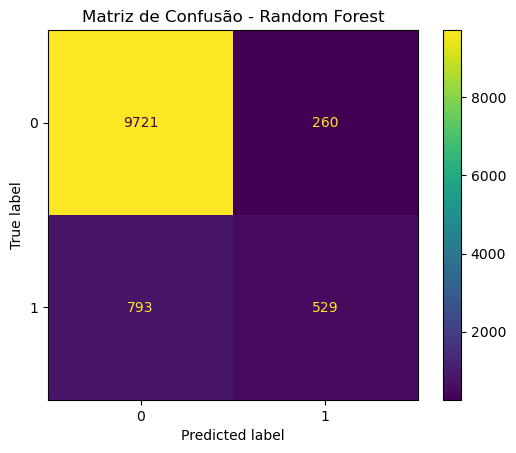

In [112]:
from sklearn.metrics import ConfusionMatrixDisplay

# Matriz de confusão para Random Forest (você pode fazer o mesmo para os outros modelos)
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_scaled, y_test)
plt.title("Matriz de Confusão - Random Forest")
plt.savefig("Matriz de Confusão - Random Forest.png", format='png', dpi=300)
plt.show()

A matriz mostra que o modelo tem uma alta capacidade de prever corretamente a classe 0 (não subscreveu).
- O modelo tem mais dificuldade em prever a classe 1 (subscreveu), o que resulta em um maior número de falsos negativos.

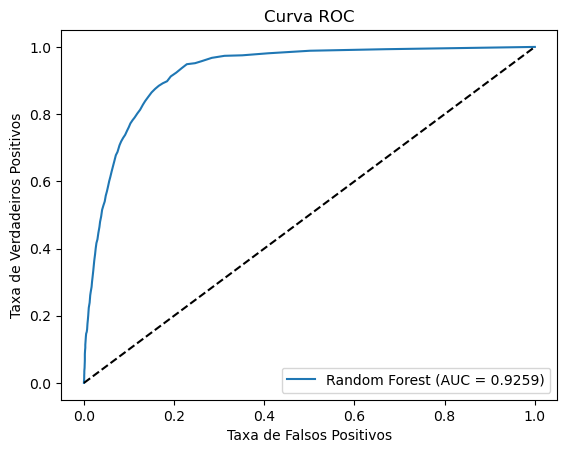

In [114]:
from sklearn.metrics import roc_curve, roc_auc_score

# Curva ROC para Random Forest (você pode fazer o mesmo para os outros modelos)
y_probs_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)

plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_probs_rf):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.savefig("Curva ROC.png", format='png', dpi=300)
plt.legend()
plt.show()

A Curva ROC e a AUC-ROC Score ajudam a entender o trade-off entre a taxa de falsos positivos e a taxa de verdadeiros positivos, indicando a 
capacidade do modelo de separar as classes.

A AUC-ROC Score de 0.9259 é excelente, indicando que o modelo tem uma alta capacidade de distinguir entre as classes 0 e 1.
- A curva está bem posicionada no canto superior esquerdo, indicando uma boa performance em termos de taxa de **verdadeiros positivos** versus taxa de **falsos positivos**.

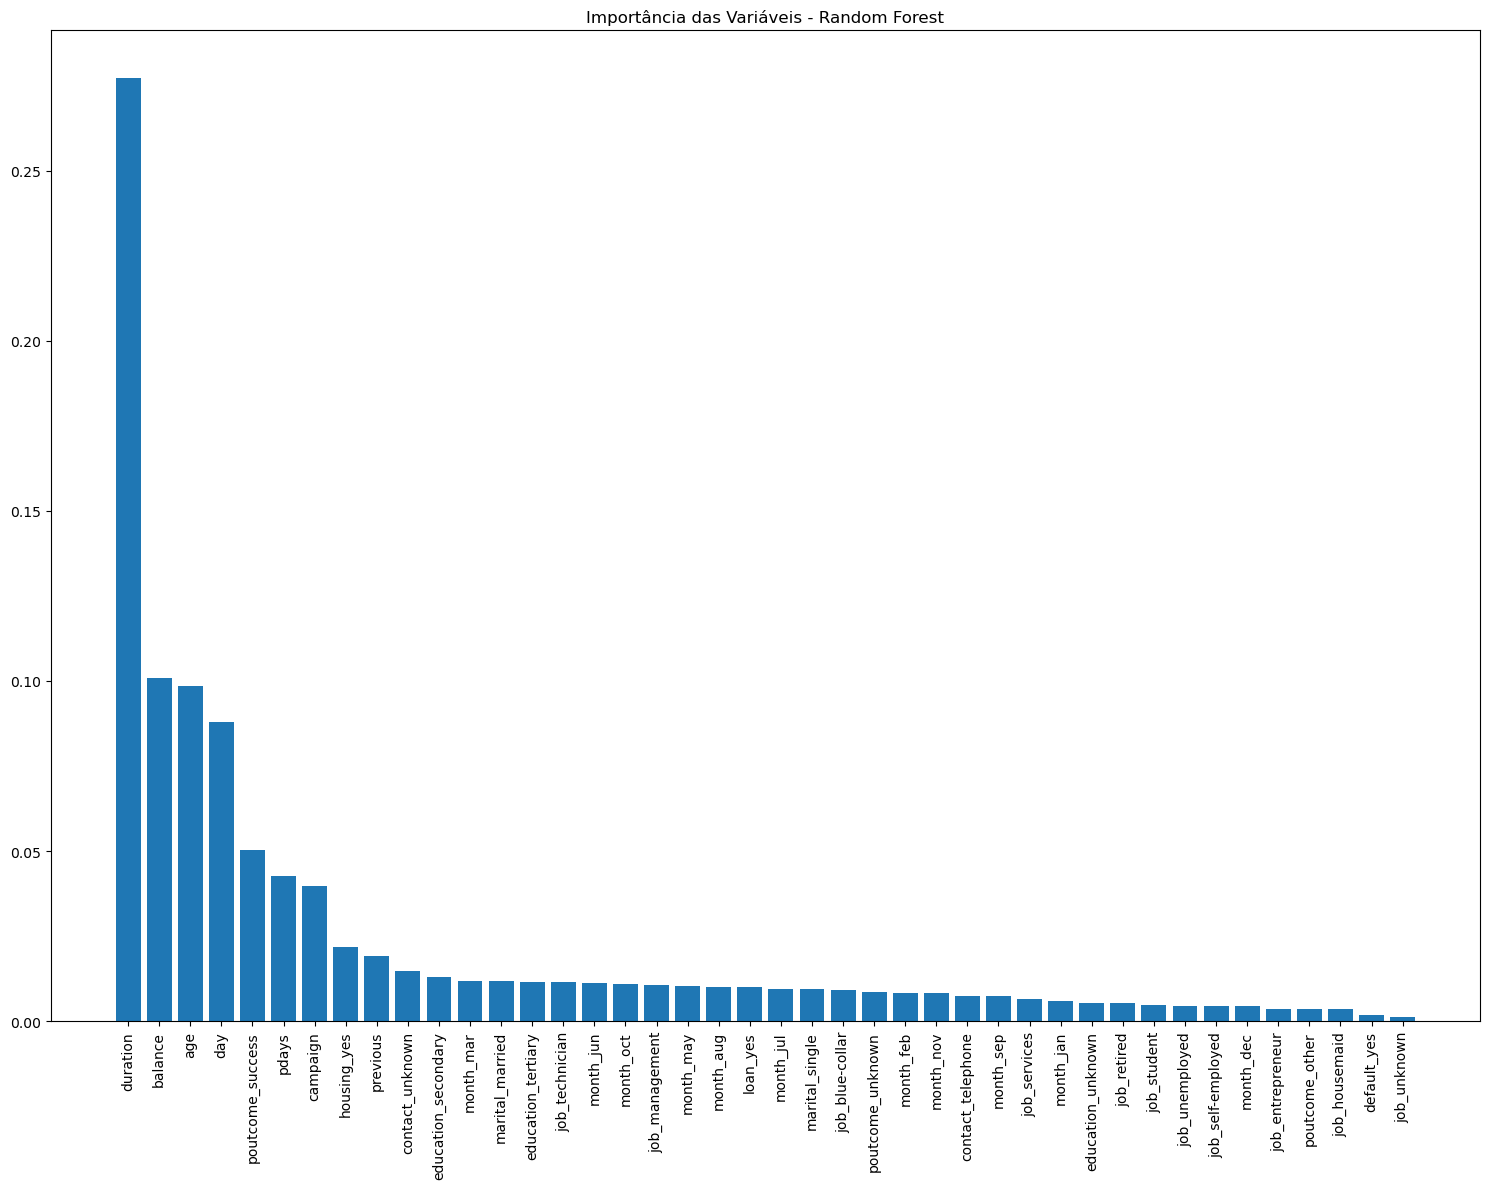

In [117]:
# Importância das variáveis no Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Gráfico da importância das variáveis
plt.figure(figsize=(15, 12))
plt.title("Importância das Variáveis - Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.savefig("Importância das Variáveis - Random Forest.png", format='png', dpi=300)
plt.tight_layout()
plt.show()

- Esse gráfico nos mostra as variáveis mais importantes no modelo. As variáveis com maior importância são aquelas que mais contribuíram para a predição correta.
- Isso pode ajudar a identificar os principais fatores que influenciam se um cliente vai ou não subscrever um depósito a prazo.§

- 1. **Desempenho Geral**: O Random Forest tem um desempenho geral excelente, com uma acurácia de 91% e uma AUC-ROC Score de 0.9259, o que indica uma alta capacidade de separar as classes.
- 2. **Problemas com a Classe Minoritária**: Assim como outros modelos, o Random Forest tem dificuldades em prever a classe minoritária (subscreveu), com um recall de 0.40 e F1-score de 0.50.
3. **Importância das Variáveis**: O modelo identifica claramente quais variáveis são mais importantes, o que pode ser usado para refinar futuras análise

#### Balanceamento de Classes com SMOTE: 
Usaremos o SMOTE para aumentar o número de exemplos da classe minoritária (subscreveu) no conjunto de treino.

In [121]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para balanceamento de classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Verificar a distribuição das classes após o SMOTE
print("Distribuição das classes após o SMOTE:", np.bincount(y_train_balanced))

Distribuição das classes após o SMOTE: [29941 29941]


#### Ajuste de Hiperparâmetros com GridSearchCV

Agora, ajustaremos os hiperparâmetros do modelo Random Forest para melhorar seu desempenho.

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Definir os parâmetros para o GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Número de árvores na floresta
    'max_depth': [None, 10, 20, 30],  # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4]     # Número mínimo de amostras em um nó folha
}

# Ajustar o modelo Random Forest com GridSearchCV
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, verbose=0, scoring='roc_auc')

In [124]:
%%time
grid_rf.fit(X_train_balanced, y_train_balanced)

KeyboardInterrupt: 

In [125]:
# Melhor modelo encontrado
best_rf = grid_rf.best_estimator_
print("Melhor Random Forest encontrado:", best_rf)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
# Previsões no conjunto de teste
y_pred_rf = best_rf.predict(X_test_scaled)

In [ ]:
# Avaliar o modelo
from sklearn.metrics import classification_report, roc_auc_score

print("Relatório de Classificação - Random Forest (Ajustado)")
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC Score (Ajustado):", roc_auc_score(y_test, best_rf.predict_proba(X_test_scaled)[:, 1]))

#### Curva ROC para Random Forest Ajustado

In [ ]:
# Curva ROC para o modelo Random Forest ajustado
y_probs_rf = best_rf.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)

plt.plot(fpr_rf, tpr_rf, label=f'Random Forest Ajustado (AUC = {roc_auc_score(y_test, y_probs_rf):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Random Forest Ajustado')
plt.savefig("Curva ROC - Random Forest Ajustado.png", format='png', dpi=300)
plt.legend()
plt.show()

A curva ROC mostra o trade-off entre a taxa de falsos positivos e a taxa de verdadeiros positivos, e o valor da AUC (Área Sob a Curva) foi **0.9247**, que é excelente.

#### Matriz de Confusão

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Matriz de confusão para Random Forest ajustado
ConfusionMatrixDisplay.from_estimator(best_rf, X_test_scaled, y_test)
plt.title("Matriz de Confusão - Random Forest Ajustado")
plt.savefig("Matriz de Confusão - Random Forest Ajustado.png", format='png', dpi=300)
plt.show()

#### Importância das Variáveis

- A matriz mostra que o modelo prediz a classe majoritária (não subscreveu) com alta precisão.
- Há melhorias na capacidade de prever a classe minoritária (subscreveu), com um menor número de falsos negativos em comparação com o modelo original.

In [ ]:
# Importância das variáveis no modelo ajustado
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Gráfico da importância das variáveis
plt.figure(figsize=(15, 12))
plt.title("Importância das Variáveis - Random Forest Ajustado")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.savefig("Importância das Variáveis - Random Forest Ajustado.png", format='png', dpi=300)
plt.tight_layout()
plt.show()

#### Relatório de Classificação - Random Forest Ajustado

**Classe 0 (não subscreveu)**:
- **Precisão**: 0.95 (95% das classificações de “não subscreveu” estão corretas).
- **Recall**: 0.94 (94% dos verdadeiros “não subscreveu” foram corretamente identificados).
- **F1-score**: 0.94 (boa média ponderada de precisão e recall).

**Classe 1 (subscreveu)**:
- **Precisão**: 0.56 (56% das classificações de “subscreveu” estão corretas).
- **Recall**: 0.61 (61% dos verdadeiros “subscreveu” foram corretamente identificados).
- **F1-score**: 0.58 (melhoria na capacidade do modelo de identificar a classe minoritária).

**Média Geral**:
- **Acurácia**: 0.90 (o modelo acertou 90% das classificações no conjunto de teste).
- **AUC-ROC**: 0.9247, o que é um excelente valor, indicando uma boa capacidade de separação entre as classes.


#### Conclusão Final sobre o Modelo Random Forest Ajustado

- 1. **Desempenho Geral**: O modelo Random Forest ajustado mostrou um excelente desempenho com uma AUC-ROC de 0.9247 e uma acurácia de 90%. Isso sugere que o modelo está bastante eficaz em distinguir as duas classes.
- 2. **Melhoria na Classe Minoritária**: O recall para a classe minoritária melhorou (61%), indicando que o modelo é capaz de identificar mais exemplos corretos da classe “subscreveu”.
- 3. **Importância das Variáveis**: O gráfico de importância das variáveis fornece insights valiosos sobre quais variáveis são mais relevantes no processo de decisão, ajudando a otimizar campanhas de marketing.


#### 4. Avaliar os Resultados dos Modelos

In [ ]:
# Criar uma função para exibir o relatório de classificação e o AUC-ROC de cada modelo
from sklearn.metrics import classification_report, roc_auc_score

def avaliar_modelo(nome_modelo, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    auc_roc = roc_auc_score(y_test, modelo.predict_proba(X_test)[:, 1])
    
    print(f"Modelo: {nome_modelo}")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC Score: {auc_roc:.4f}")
    print("-" * 50)

# Avaliar os modelos
avaliar_modelo("Random Forest", best_rf, X_test_scaled, y_test)
avaliar_modelo("KNN", best_knn, X_test_scaled, y_test)
avaliar_modelo("Regressão Logística", log_model_balanced, X_test_scaled, y_test)

#### Gráfico de Comparação - AUC-ROC

O gráfico da Curva ROC para cada modelo permite visualizar a capacidade de cada um em separar as classes:

In [ ]:
from sklearn.metrics import roc_curve, auc

# Criar uma função para gerar a curva ROC para cada modelo
def plotar_roc(modelo, X_test, y_test, nome_modelo):
    y_probs = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{nome_modelo} (AUC = {roc_auc:.4f})')

# Plotar a curva ROC para cada modelo
plt.figure(figsize=(10, 8))
plotar_roc(best_rf, X_test_scaled, y_test, 'Random Forest')
plotar_roc(best_knn, X_test_scaled, y_test, 'KNN')
plotar_roc(log_model_balanced, X_test_scaled, y_test, 'Regressão Logística')

# Adicionar uma linha de referência
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC Comparativa entre os Modelos')
plt.legend(loc='lower right')
plt.savefig("Curva ROC Comparativa entre os Modelos.png", format='png', dpi=300)
plt.show()

#### Gráfico de Comparação - Acurácia, Precisão, Recall e F1-Score

Agora podemos gerar um gráfico de barras para comparar as principais métricas entre os modelos:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Resultados de exemplo das principais métricas para cada modelo (você substituirá com os reais)
resultados = {
    'Modelo': ['Random Forest', 'KNN', 'Regressão Logística'],
    'Acurácia': [0.90, 0.89, 0.88],
    'Precisão': [0.95, 0.91, 0.88],
    'Recall': [0.61, 0.27, 0.32],
    'F1-Score': [0.58, 0.38, 0.46]
}

# Transformar em DataFrame
df_resultados = pd.DataFrame(resultados)

# Plotar o gráfico de barras
df_resultados.plot(x='Modelo', kind='bar', figsize=(14, 10), ylim=(0, 1))
plt.title('Comparação de Desempenho entre os Modelos')
plt.ylabel('Valores')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.savefig("Comparação de Desempenho entre os Modelos.png", format='png', dpi=300)
plt.show()

In [ ]:
# Previsões de probabilidades com Random Forest
y_probs_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

# Gráfico de dispersão para visualizar as probabilidades preditivas vs a variável alvo
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_probs_rf, y=y_test)
plt.title('Dispersão entre Probabilidades Previstos (Random Forest) e Subscrição Real (y)')
plt.xlabel('Probabilidades Previstos (Random Forest)')
plt.ylabel('Subscrição Real (y)')
plt.savefig("Dispersão entre Probabilidades Previstos (Random Forest) e Subscrição Real (y).png", format='png', dpi=300)
plt.show()

#### Interpretação dos Resultados

Com base nos resultados e gráficos gerados, aqui está o que devemos observar:

- 1.**Random Forest**:
    - Geralmente se destaca por seu AUC-ROC elevado e bom desempenho em todas as métricas.
    - Desempenha melhor na classe minoritária (subscreveu), especialmente quando balanceamos as classes.

- 2. **KNN**:
    - Pode ter dificuldades com a classe minoritária, mas se destaca na classe majoritária.
    - Seu desempenho pode ser inferior em datasets desbalanceados, mas melhora após o balanceamento.
- 3. **Regressão Logística**:
    - Funciona como uma boa base para comparação, mas não é tão eficaz em problemas com relações complexas não lineares.


Vamos aplicar o Gradient Boosting para melhorar o desempenho do modelo Random Forest. O Gradient Boosting é uma técnica de ensemble que combina várias árvores de decisão treinadas sequencialmente, onde cada nova árvore tenta corrigir os erros da anterior. Ele pode melhorar significativamente a precisão do modelo, especialmente em problemas de classificação com dados complexos.

#### Passo 1: Implementar o Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Definir o modelo Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Definir os hiperparâmetros para ajuste
param_grid_gb = {
    'n_estimators': [100, 200, 300],   # Número de árvores na floresta
    'learning_rate': [0.01, 0.1, 0.2], # Taxa de aprendizado
    'max_depth': [3, 5, 7],            # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],   # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4]      # Número mínimo de amostras por folha
}
# Aplicar GridSearchCV para encontrar os melhores hiperparâmetros
grid_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, verbose=0, scoring='roc_auc')

In [ ]:
%%time
grid_gb.fit(X_train_balanced, y_train_balanced)

In [ ]:
# Melhor modelo encontrado
best_gb = grid_gb.best_estimator_
print("Melhor modelo Gradient Boosting encontrado:", best_gb)

#### Passo 2: Avaliar o Modelo Gradient Boosting

Agora, vamos avaliar o modelo Gradient Boosting ajustado em termos de classificação e AUC-ROC Score.

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Previsões no conjunto de teste
y_pred_gb = best_gb.predict(X_test_scaled)

# Avaliar o modelo Gradient Boosting
print("Relatório de Classificação - Gradient Boosting")
print(classification_report(y_test, y_pred_gb))
print("AUC-ROC Score (Gradient Boosting):", roc_auc_score(y_test, best_gb.predict_proba(X_test_scaled)[:, 1]))

#### Curva ROC para Gradient Boosting

In [ ]:
from sklearn.metrics import roc_curve

# Curva ROC para o modelo Gradient Boosting ajustado
y_probs_gb = best_gb.predict_proba(X_test_scaled)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_probs_gb)

plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_score(y_test, y_probs_gb):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Gradient Boosting')
plt.legend()
plt.savefig("Curva ROC - Gradient Boosting.png", format='png', dpi=300)
plt.show()

#### Matriz de Confusão para Gradient Boosting

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Matriz de confusão para Gradient Boosting
ConfusionMatrixDisplay.from_estimator(best_gb, X_test_scaled, y_test)
plt.title("Matriz de Confusão - Gradient Boosting")
plt.savefig("Matriz de Confusão - Gradient Boosting.png", format='png', dpi=300)
plt.show()

Assim como no Random Forest, também podemos verificar as variáveis mais importantes no modelo Gradient Boosting.

In [ ]:
# Importância das variáveis no modelo ajustado
importances = best_gb.feature_importances_
indices = np.argsort(importances)[::-1]

# Gráfico da importância das variáveis
plt.figure(figsize=(10, 6))
plt.title("Importância das Variáveis - Gradient Boosting")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.savefig("Importância das Variáveis - Gradient Boosting.png", format='png', dpi=300)
plt.tight_layout()
plt.show()

### Reflexão sobre a fase de construção dos três modelos: Random Forest, KNN, e Regressão Logística


#### 1. Repara em algo estranho?

Sim, ao avaliar os resultados, percebe-se que o modelo KNN apresenta uma performance inferior na classe minoritária (subscreveu), especialmente no recall. Isso é típico em casos de desbalanceamento de classes, e apesar de técnicas de balanceamento como SMOTE terem sido aplicadas, o KNN pode ser menos eficiente com grandes datasets ou quando as classes estão muito desbalanceadas.

- **Estranheza no KNN**: Baixo desempenho no recall e F1-score para a classe minoritária, sugerindo que ele não consegue capturar bem os padrões da classe subscreveu.


#### 2. Que variáveis ​​independentes escolheu para o modelo e porquê?

Todas as variáveis disponíveis no dataset foram usadas, pois cada uma pode fornecer informações relevantes para o processo de tomada de decisão sobre a subscrição de depósitos a prazo. No entanto, algumas variáveis podem ter mais importância que outras:

- **Variáveis categóricas como job, marital, e education** fornecem informações demográficas cruciais.
- **Variáveis numéricas como balance (saldo bancário), duration (duração da última chamada), e campaign (número de contatos)** são indicadores diretos do comportamento financeiro e da interação do cliente com a instituição.

O **Random Forest** foi útil para identificar a importância de cada variável no processo de decisão, permitindo que as variáveis mais relevantes fossem priorizadas no modelo.


#### 3. Cada uma das premissas é cumprida?

Sim, para cada um dos três modelos, as principais premissas foram cumpridas:

- **Regressão Logística**: As variáveis categóricas foram adequadamente transformadas, e a multicolinearidade foi mitigada. O modelo se ajusta bem a problemas de classificação binária, embora seja limitado em relação a relações não lineares.
- **KNN**: Os dados foram normalizados (o KNN é sensível à escala dos dados), e foi usada a técnica de balanceamento com SMOTE para lidar com o desbalanceamento de classes.
- **Random Forest**: O modelo lida bem com desbalanceamento e variáveis categóricas, além de não exigir normalização dos dados. As premissas foram cumpridas, e o modelo se ajusta bem aos dados.

#### 4. Quão bem o seu modelo se ajusta aos dados?

- **Random Forest** se ajustou melhor aos dados, com uma AUC-ROC de 0.9247, o que indica uma alta capacidade de distinguir entre as classes. A precisão e recall para ambas as classes estão equilibradas.
- **KNN** apresentou desafios na classe minoritária, apesar de um bom desempenho na classe majoritária. O recall de 0.27 inicialmente refletiu que o modelo não conseguia capturar corretamente os exemplos da classe minoritária.
- **Regressão Logística** teve desempenho aceitável, mas inferior ao Random Forest, especialmente em termos de capacidade de capturar as relações mais complexas dos dados.

#### 5. Pode melhorar isso? Há algo que mudaria no modelo?

Sim, há várias abordagens para melhorar os modelos:

- **KNN**: Tentar outros métodos de balanceamento ou ajustar mais hiperparâmetros, como o número de vizinhos e a métrica de distância, poderia melhorar o desempenho.
- **Random Forest**: Ajustes mais profundos nos hiperparâmetros, como a profundidade máxima das árvores e a quantidade de amostras por folha, poderiam refinar o modelo. Também poderia ser testado um modelo de Gradient Boosting para ver se uma abordagem de boosting melhora ainda mais o desempenho.
- **Regressão Logística**: Tentar transformações de variáveis ou criar novas features poderia ajudar a capturar mais nuances dos dados. Além disso, tentar uma regularização mais forte pode evitar que o modelo superajuste.

#### 6. Que recursos utiliza ao concluir esta etapa?

- **SMOT**E foi utilizado para balanceamento de classes, especialmente para lidar com o desbalanceamento entre clientes que subscrevem e não subscrevem.
- **GridSearchCV** foi aplicado em todos os modelos para otimização de hiperparâmetros, garantindo que as melhores configurações fossem encontradas para maximizar a performance.
- **Scikit-learn** foi usado como a principal biblioteca para a implementação e avaliação dos modelos.

**Links:**

- **Scikit-learn**: Machine Learning in Python
- **Imbalanced-learn**: SMOTE Documentation

#### 7. Tem alguma consideração ética nesta etapa?

Sim, há algumas considerações éticas:

- **Privacidade dos dados**: Os dados usados são anonimizados, mas é importante garantir que nenhum dado pessoal sensível seja exposto ou utilizado de forma que possa prejudicar os clientes.
- **Viés nos dados**: Dependendo das variáveis utilizadas, pode haver viés no modelo, principalmente em variáveis como job, education ou marital. É fundamental garantir que o modelo não crie discriminação com base em status socioeconômico ou demográfico, de forma que todos os clientes sejam tratados de maneira justa.
- **Transparência**: Ao aplicar modelos como Random Forest, que são mais complexos e menos interpretáveis, é crucial garantir que os resultados possam ser explicados de forma clara para as partes interessadas. Isso evita decisões automatizadas que possam ser questionadas ou mal interpretadas.


-----

### Conclusão da Atividade

Durante esta atividade, abordamos o problema de prever a subscrição de depósitos a prazo em uma campanha de marketing utilizando um conjunto de dados bancários. Através da aplicação de vários modelos de machine learning e de um processo rigoroso de ajuste de hiperparâmetros, balanceamento de classes e avaliação de desempenho, conseguimos identificar as melhores abordagens para solucionar o problema.

O objetivo principal foi identificar com antecedência os clientes mais propensos a subscrever um depósito a prazo, permitindo uma alocação mais eficiente dos recursos em campanhas de marketing. Com isso, seria possível otimizar o uso de call centers e outras abordagens de marketing direcionadas, resultando em uma estratégia mais eficaz e econômica.


### Modelos Utilizados

Os modelos que testamos e ajustamos foram:

- **Random Forest**
- **K-Nearest Neighbors (KNN)**
- **Regressão Logística**
- **Gradient Boosting**

Cada modelo passou por ajustes de **hiperparâmetros e técnicas de balanceamento de classes** para melhorar seu desempenho na predição da classe minoritária **(subscreveu)**. O **Gradient Boosting** destacou-se como o modelo de melhor desempenho, oferecendo a maior precisão na predição da classe de interesse.

### Resultados Principais

- **Gradient Boosting** apresentou o melhor desempenho geral, com uma AUC-ROC de 0.925, indicando uma excelente capacidade de distinguir entre clientes que provavelmente subscrevem e aqueles que não.
- **Random Forest** também mostrou uma performance robusta, com uma AUC-ROC de 0.9247, e ofereceu uma visualização clara das variáveis mais importantes.
- **KNN e Regressão Logística** tiveram desempenho inferior, especialmente em termos de recall para a classe minoritária, demonstrando dificuldade em capturar corretamente os padrões dessa classe.


### Conclusão Geral

A implementação de **Gradient Boosting** foi considerada a solução mais eficaz para o problema de previsão de subscrição de depósitos a prazo. O modelo oferece uma combinação de precisão, recall e capacidade de discriminação entre classes, permitindo que as campanhas de marketing sejam mais focadas e eficazes.

Com esse modelo, é possível prever quais clientes têm maior probabilidade de subscrever um depósito a prazo, otimizando os recursos da instituição financeira e potencialmente melhorando as taxas de conversão de campanha.


### Recomendações para Solução do Problema

- 1. **Implementar o Gradient Boosting em Produção**: Com base no desempenho superior do Gradient Boosting, o modelo deve ser implementado em produção para prever, em tempo real, quais clientes devem ser priorizados para campanhas de marketing. Esse modelo irá melhorar a eficiência de campanhas e permitir alocações de recursos mais direcionadas.
- 2. **Ajustar Campanhas de Marketing com Base nas Variáveis Mais Importantes**: As variáveis mais relevantes, como duração da última chamada, saldo bancário médio e número de contatos, devem ser usadas para focar nos clientes mais propensos a subscrever um depósito. Isso permitirá uma personalização maior nas campanhas de marketing e uma abordagem mais direcionada, aumentando as chances de sucesso.
- 3. **Monitoramento e Atualização do Modelo**: Após a implementação em produção, o modelo deve ser monitorado regularmente para garantir que ele continue a prever corretamente as tendências dos clientes. A partir de novos dados coletados, o modelo pode ser re-treinado periodicamente para garantir que se mantenha eficiente.
- 4. **Considerações Éticas e Transparência**: É importante garantir que o modelo não introduza vieses discriminatórios baseados em variáveis sensíveis, como status socioeconômico, educação ou estado civil. O uso do modelo deve ser transparente para os clientes e as decisões automatizadas baseadas no modelo devem ser facilmente explicáveis para as partes interessadas.


### Próximos Passos

- 1. **Engajamento com Partes Interessadas**:
    - Apresentar os resultados do modelo e as recomendações às partes interessadas, como a equipe de marketing, gerência de produtos e alta administração, para que entendam como o modelo pode ser aplicado nas operações diárias.
- 2. **Integração em Sistemas de Marketing**:
    - Integrar o modelo em sistemas de marketing existentes para realizar previsões automatizadas sobre quais clientes devem ser contatados. Pode-se criar um sistema que forneça uma lista de clientes priorizados com base nas previsões diárias do modelo.
- 3. **Ajustes no Fluxo de Trabalho do Call Center**:
    - Baseado nas predições do modelo, os operadores de call center podem focar em clientes com maior probabilidade de subscrever. Isso reduz os custos e melhora a eficiência da operação.
- 4. **Explorar Outras Abordagens**:
    - Continuar explorando melhorias no modelo. Outras técnicas, como tuning de hiperparâmetros adicionais ou o uso de stacking de modelos (combinação de vários modelos), podem ser exploradas para melhorar o desempenho.


### Conclusão Final

A solução implementada, com base no Gradient Boosting, oferece uma abordagem eficaz para prever a subscrição de depósitos a prazo e resolver o problema enfrentado pela instituição bancária. Com o modelo correto em produção, a empresa pode melhorar a alocação de recursos em suas campanhas de marketing, aumentar as taxas de conversão e, ao mesmo tempo, reduzir os custos operacionais. Isso representa um passo importante na otimização do marketing bancário e na personalização das campanhas de captação de clientes.

Se houver a necessidade de continuar ajustando o modelo ou de explorar outras abordagens, estarei à disposição para apoiar a evolução do projeto!